### Анализ качества воздуха

**Описание**:

В данной работе планируется проанализировать данные о качестве воздуха в Мурино.

Данные о качестве воздуха в Санкт-Петербурге есть на сайте ФГБУ «Северо-Западное управление по гидрометеорологии и мониторингу окружающей среды» http://www.meteo.nw.ru/weather/air_pollution.php, но они там представлены в неструктурированном виде и нет исторических данных

Для анализа будут использованы данные станций контроля загрязнения атмосферного воздуха Ленинградской области https://kpr.lenobl.ru/ru/deiatelnost/ohrana-i-monitoring-okruzhayushej-sredy/dannye-avtomaticheskih-postov-monitoringa-atmosfernogo-vozduha/

Однако в этих данных нет информации о направлении ветра. 
Архив погоды, содержащий информацию о направлении ветра скачан с сайта https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B5 и сохранен в папку `data\weather_history`

### Описание данных:

Станции контроля загрязнения атмосферного воздуха осуществляют  автоматическое измерение массовых концентраций следующих загрязняющих веществ:

- взвешенных частиц фракций (РМ 2,5 и РМ 10),
- оксида углерода (CO),
- диоксида азота (NO2),
- диоксида серы (SO2),
- озона (O3),
- сероводорода (H2S).

In [1]:
# ячейка для импортов модулей проекта
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote
import os
from openpyxl import load_workbook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных

В данном разделе выполните выгрузку данных из внешних источников и их локальное сохранение

Вы можете вынести всю логику выгрузки в отдельный `.py` скрипт (или набор скриптов), поместив их в директорию `scripts` в корне проекта, но продублируйте весь код здесь тоже, чтобы можно было запустить ноутбук с самого начала

In [2]:
response_get = requests.get("https://kpr.lenobl.ru/ru/deiatelnost/ohrana-i-monitoring-okruzhayushej-sredy/dannye-avtomaticheskih-postov-monitoringa-atmosfernogo-vozduha/")
print(response_get.status_code)  # Проверка статус-кода
print(response_get.text[:100])  # Печать текста ответа

200

<!DOCTYPE html>
<html lang="ru" >
<head>
  <meta http-equiv="Content-Type" content="text/html; char


In [3]:
URL="https://kpr.lenobl.ru/ru/deiatelnost/ohrana-i-monitoring-okruzhayushej-sredy/dannye-avtomaticheskih-postov-monitoringa-atmosfernogo-vozduha/"

URL_FOR_FILES_PREFIX = "https://kpr.lenobl.ru"
params = {}
headers = {"User-Agent": "",  # User-Agent вставьте из браузера (используя инструменты разработчика)
           "Cookie": "".encode("utf-8")}  # Cookie вставьте из браузера (используя инструменты разработчика)

resp = requests.get(URL, params=params, headers=headers)
soup = BeautifulSoup(resp.text, "lxml")

Суточные данные имеют метку (CC), данные максимального разрешения (20-минутный интервал) имеют метку (МР)

 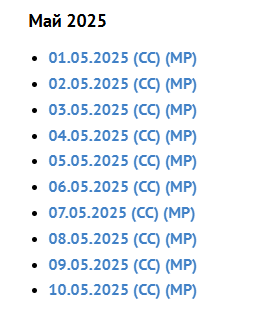

## Извлекаем ссылки на файлы с данными максимального рарешения (с меткой (МР))

In [4]:
all_items = soup.find_all("a")  # находим все ссылки
# Формируем список файлов для скачивания
file_list = []
for item in all_items:
    if "(МР)" in item.get_text():
        file_list.append(item["href"])
print(f"Извлечено {len(file_list)} ссылок")

print('Имена первых 3 файлов:')
file_list[0:3]

Извлечено 781 ссылок
Имена первых 3 файлов:


['/media/uploads/userfiles/2025/05/02/01.05.2025_20-%D0%BC%D0%B8%D0%BD%D1%83%D1%82%D0%BD%D0%BE%D0%B5.xlsx',
 '/media/uploads/userfiles/2025/05/03/02.05.2025_20-%D0%BC%D0%B8%D0%BD%D1%83%D1%82%D0%BD%D0%BE%D0%B5.xlsx',
 '/media/uploads/userfiles/2025/05/04/03.05.2025_20-%D0%BC%D0%B8%D0%BD%D1%83%D1%82%D0%BD%D0%BE%D0%B5.xlsx']

### Скачиваем файлы по ссылкам в папку `data`

In [5]:
URL_FOR_FILES_PREFIX = "https://kpr.lenobl.ru"
for file_i in file_list:
    try:
        file_url = URL_FOR_FILES_PREFIX + file_i
        resp_file = requests.get(file_url)
        # Декодирование имени файла, содержащего кириллицу из URL
        decoded_filename = unquote(file_i.split('/')[-1])
        # сохранение данных в файл
        filename = os.path.join('data', decoded_filename)
        with open(filename, 'wb') as file:
            file.write(resp_file.content)
    except Exception:
        print(f'Ошибка скачивания файла {file_i}')

Ошибка скачивания файла /media/uploads/userfiles/2022/11/11/10.11.2022_%D0%BC%D0%B0%D0%BA%D1%81._%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_20_%D0%BC%D0%B8%D0%BD.xlsx


Архив погоды, содержащий информацию о направлении ветра скачан с сайта https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B5 для метеостанции в Мурино.
Загружены данные за период 17.10.2022 - 12.05.2025

In [6]:
weather_history_file = r"data\weather_history\26063.17.10.2022.12.05.2025.1.0.0.ru.utf8.00000000.xls"

## Очистка данных и подготовка к анализу

В данном разделе выполните все шаги, связанные с предобработкой:
- приведение ваших данных к формату датафрейма (если это не было сделано выше)
- разведочный анализ (EDA)

Exploratory Data Analysis (EDA) - важный этап анализа данных, помогающий понять, с чем мы вообще имеем дело. [Пример выполнения разведанализа](https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python). Не копируйте все функции в лоб - на что именно стоит смотреть зависит от вашего исследования, однако точно стоит посмотреть на:
- какие переменные (колонки) вообще есть
- каких они типов
- есть ли пропуски
- как переменные распределены (если в этом есть смысл). Для по крайней мере начального анализа распределений и/или трендов в данных, возможно, есть смысл построить визуализации

---

Если хотите, можете попробовать вот [эту библиотеку](https://docs.profiling.ydata.ai/latest/) (полезна для EDA), но огромная просьба - не вставляйте куски кода с ней в конечный отчёт, ибо запуска процесса профилирования может быть довольно долгим, а на больших датасетах это может приводить к довольно тяжелым ноутбукам. Если будете использовать вышеупомянутый `ydata-profiling`, делайте это в отдельном ноутбуке (назовите его `EDA.ipynb`), а в этом постарайтесь обойтись без него

### Загрузка данных из файлов.
Файлы содержат ряд вкладок для разных постов наблюдения. Будем загружать данные из вкладки `1.  г. Мурино   ул. Оборонная,`
Интересующая вкладка может иметь разные имена, но замечено что в ней должны встречаться слова "Мурино" или "Оборонная"

In [7]:
def find_sheet_name(wb):
    """Поиск в документе вкладки вида `1.  г. Мурино   ул. Оборонная', лист имеет ряд возможных написаний."""
    for sheet_name in wb.sheetnames:
        if ("Мурино" in sheet_name) or ("Оборонная" in sheet_name):
            return sheet_name
    return None

На листе данные могут начинаться с третьей или второй строки (иногда ы первой строке приведено имя станции контроля).  

Нужно дополнительно понять с какой строки начинаются данные. Данные начинаются после строки с заголовком таблицы. 
В первом столбце заголовка таблицы обычно написаны такие строки:
- 'Time Europe/Moscow \n (GMT +03:00)'
- 'Время Europe/Moscow \n (GMT +03:00)',
- 'Время (Europe/Moscow)', 
- 'Время (+03:00)',

In [8]:
def get_xlsx_files_in_folder(folder):
    "Формирование списка xlsx файлов в папке folder"
    files = []
    for entry in os.scandir(folder):
        if not entry.name.startswith('.') and entry.is_file() and entry.name.endswith('.xlsx'):
            d = os.path.join(folder, entry.name)
            files.append(d)
    return files

def find_table_start_row(ws):
    # Поиск начала таблицы
    for row in range(1, 4):
        cell_text = ws.cell(row=row, column=1).value
        if cell_text is None:
            continue
        if ('Time' in cell_text) or ('Время' in cell_text):
            return row
    return None

In [9]:
def load_data_from_sheet(ws, start_row):
    """Загрузка данных с листа xlsx файла"""


In [12]:
file_list = get_xlsx_files_in_folder('data')
print(f"Обнаружено {len(file_list)} файлов в папке data")
print(f"Имена первых 3 файлов:\n {file_list[0:3]}")

Обнаружено 756 файлов в папке data
Имена первых 3 файлов:
 ['data\\004.09.2024_20-минутные.xlsx', 'data\\01-08.01.2023_20-минутные.xlsx', 'data\\01.01.2024_20-минутные.xlsx']


Загружаем данные из скачанных файлов с вкладки Мурино, если такая есть в документе в pandas dataframe

In [13]:
time_name = set()
sheet_name_found = 0
sheet_name_not_found = 0
table_start_found = 0
table_start_not_found = 0
files_processed = 0
df = None
# Колонки с одними и теми же значениями в разных файлах могут иметь разные
# названия, ниже приведен словарь для унификации названий колонов
column_rename_dict = {
    'Time Europe/Moscow \n (GMT +03:00)': 'Время Europe/Moscow (GMT +03:00)', 
    'Время \n(Europe/Moscow (GMT +03:00))': 'Время Europe/Moscow (GMT +03:00)', 
    'Время (+03:00)': 'Время Europe/Moscow (GMT +03:00)', 
    'Время (Europe/Moscow)': 'Время Europe/Moscow (GMT +03:00)', 
    'Время Europe/Moscow \n (GMT +03:00)': 'Время Europe/Moscow (GMT +03:00)', 
    'TEMPERATURE \n °C': 'Температура (°C)',
    'PRESSURE \n mm Hg': 'Давление (мм рт.ст.)',
    'HUMIDITY \n %': 'Влажность (%)',
    'PM2 \n µg/m³': 'PM2.5 (мкг/м³)',
    'PM2 \n mg/m³': 'PM2.5 (мкг/м³)',
    'PM2.5 \n µg/m³': 'PM2.5 (мкг/м³)',
    'PM2 \n доли ПДК': 'PM2.5 (Доли ПДК)',
    'PM10 \n µg/m³': 'PM10 (мкг/м³)',
    'PM10 \n mg/m³': 'PM10 (мкг/м³)',
    'PM10 \n доли ПДК': 'PM10 (Доли ПДК)',
    'CO \n µg/m³': 'CO (мкг/м³)',
    'CO \n mg/m³': 'CO (мкг/м³)',
    'CO \n доли ПДК': 'CO (Доли ПДК)',
    'NO2 \n µg/m³': 'NO2 (мкг/м³)',
    'NO2 \n mg/m³': 'NO2 (мкг/м³)',
    'NO2 \n доли ПДК': 'NO2 (Доли ПДК)',
    'SO2 \n µg/m³': 'SO2 (мкг/м³)',
    'SO2 \n mg/m³': 'SO2 (мкг/м³)',
    'SO2 \n доли ПДК': 'SO2 (Доли ПДК)',
    'O3 \n µg/m³': 'O3 (мкг/м³)',
    'O3 \n mg/m³': 'O3 (мкг/м³)',
    'O3 \n доли ПДК': 'O3 (Доли ПДК)',
    'H2S \n µg/m³': 'H2S (мкг/м³)',
    'H2S \n mg/m³': 'H2S (мкг/м³)',
    'H2S \n доли ПДК': 'H2S (Доли ПДК)',
        }

for filename in file_list:
    files_processed += 1
    if not filename.endswith('xlsx'):
        # встретился один файл с расширением .ods (29.12.2022_макс.разовые.ods)
        continue
    wb = load_workbook(filename)
    # Находим имя вкладки с данными по Мурино
    sheet_name = find_sheet_name(wb)
    if sheet_name is None:
        # Не найден лист с нужной вкладкой в файле filename
        # print(f"Не найден лист в файле {filename}")
        # print(wb.sheetnames)
        sheet_name_not_found += 1
        continue
    sheet_name_found += 1
    ws = wb[sheet_name]
    try:
        # находим номер строки с которой начинаются данные
        row = find_table_start_row(ws)
        if row is None:
            # не найдена таблица с данными на вкладке
            table_start_not_found += 1
            print(filename)
        else:
            # найдена таблица с данными на вкладке, загружаем данные из нее

            time_name.add(ws.cell(row=row, column=1).value) # разные варианты написания колонки с временем
            table_start_found += 1
            df_i = pd.read_excel(filename, sheet_name=sheet_name, header=row-1)
            # Переименуем имена колонов для корректного объединения
            df_i = df_i.rename(columns=column_rename_dict)
            if df is None:
                # если датафрейма еще нет, это первый файл с данными, 
                # создаем из него датафрейм
                df = df_i
            else:
                # добавляем данные из текущей таблицы к общему набору данных
                df = pd.concat([df, df_i], ignore_index=True)
    except Exception:
        print(f"Не найден заголовок таблицы в файле {filename}")
        print(ws.cell(row=1, column=1).value)
        print(ws.cell(row=2, column=1).value)

print(f"Обработано {files_processed} файлов")
print(f"- в {sheet_name_not_found} файлах не найден лист для станции наблюдения в Мурино")
print(f"- в {sheet_name_found} файлах найден лист для станции наблюдения в Мурино")
print(f"   - в {sheet_name_found} файлах найден заголовок таблицы для {table_start_found} файлов и не найден для {table_start_not_found} файлов")

c:\Users\domin\Downloads\учёба\project_spring_2025\air_env\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


Обработано 756 файлов
- в 87 файлах не найден лист для станции наблюдения в Мурино
- в 669 файлах найден лист для станции наблюдения в Мурино
   - в 669 файлах найден заголовок таблицы для 669 файлов и не найден для 0 файлов


## Анализ и визуализация

Выведем размер датафрейма (число строк, число столбцов)

In [14]:
df.shape

(48610, 22)

Выводим первые несколько записей собранного набора данных

In [15]:
df.head(10)

Время Europe/Moscow (GMT +03:00)  Температура (°C)  Давление (мм рт.ст.)  \
0                 2024-09-04 00:00            18.472               769.927   
1                 2024-09-04 00:20            18.341               769.918   
2                 2024-09-04 00:40            18.029               769.954   
3                 2024-09-04 01:00            17.881               769.950   
4                 2024-09-04 01:20            17.902               769.977   
5                 2024-09-04 01:40            17.833               770.002   
6                 2024-09-04 02:00            17.886               770.174   
7                 2024-09-04 02:20            17.823               770.330   
8                 2024-09-04 02:40            17.795               770.373   
9                 2024-09-04 03:00            17.772               770.373   

   Влажность (%)  PM2.5 (мкг/м³)  PM2.5 (Доли ПДК)  PM10 (мкг/м³)  \
0         70.252           19.65             0.123          23.15   
1         70.958           20.15             0.126          23.25   
2         71.592           20.90             0.131          24.65   
3         72.469           19.70             0.123          22.45   
4         72.484           19.75             0.123          23.10   
5         72.395           18.95             0.118          21.80   
6         72.175           18.90             0.118          21.65   
7         72.561           19.35             0.121          22.75   
8         73.026           19.95             0.125          22.80   
9         73.407           20.85             0.130          23.65   

   PM10 (Доли ПДК)  CO (мкг/м³)  CO (Доли ПДК)  ...  SO2 (мкг/м³)  \
0            0.077      392.684          0.079  ...         2.123   
1            0.077      393.643          0.079  ...         2.711   
2            0.082      394.653          0.079  ...         0.560   
3            0.075      387.268          0.077  ...         1.741   
4            0.077      393.171          0.079  ...         1.383   
5            0.073      382.434          0.076  ...         0.000   
6            0.072      377.792          0.076  ...         0.000   
7            0.076      376.486          0.075  ...         0.000   
8            0.076      379.065          0.076  ...         0.000   
9            0.079      382.638          0.077  ...         0.000   

   SO2 (Доли ПДК)  O3 (мкг/м³)  O3 (Доли ПДК)  H2S (мкг/м³)  H2S (Доли ПДК)  \
0           0.004       17.287          0.108         0.502           0.063   
1           0.005       16.203          0.101         0.495           0.062   
2           0.001       16.192          0.101         0.450           0.056   
3           0.003       17.553          0.110         0.486           0.061   
4           0.003       17.748          0.111         0.430           0.054   
5           0.000       19.620          0.123         0.374           0.047   
6           0.000       20.494          0.128         0.337           0.042   
7           0.000       21.146          0.132         0.334           0.042   
8           0.000       21.419          0.134         0.347           0.043   
9           0.000       20.659          0.129         0.338           0.042   

   Столбец1  Столбец2  Столбец3  Столбец4  
0       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN  
2       NaN       NaN       NaN       NaN  
3       NaN       NaN       NaN       NaN  
4       NaN       NaN       NaN       NaN  
5       NaN       NaN       NaN       NaN  
6       NaN       NaN       NaN       NaN  
7       NaN       NaN       NaN       NaN  
8       NaN       NaN       NaN       NaN  
9       NaN       NaN       NaN       NaN  

[10 rows x 22 columns]

Проанализируем типы данных в столбцах

In [16]:
df.dtypes

Время Europe/Moscow (GMT +03:00)     object
Температура (°C)                    float64
Давление (мм рт.ст.)                float64
Влажность (%)                       float64
PM2.5 (мкг/м³)                      float64
PM2.5 (Доли ПДК)                    float64
PM10 (мкг/м³)                       float64
PM10 (Доли ПДК)                     float64
CO (мкг/м³)                         float64
CO (Доли ПДК)                       float64
NO2 (мкг/м³)                        float64
NO2 (Доли ПДК)                      float64
SO2 (мкг/м³)                        float64
SO2 (Доли ПДК)                      float64
O3 (мкг/м³)                         float64
O3 (Доли ПДК)                       float64
H2S (мкг/м³)                        float64
H2S (Доли ПДК)                      float64
Столбец1                            float64
Столбец2                            float64
Столбец3                            float64
Столбец4                            float64
dtype: object

Преобразуем данные в столбце с временем в тип `datetime`

In [17]:
df['Время Europe/Moscow (GMT +03:00)'] = pd.to_datetime(df['Время Europe/Moscow (GMT +03:00)'])

Посмотрим - сколько пропущенных значений в каждой колонке.

In [18]:
df.isnull().sum()

Время Europe/Moscow (GMT +03:00)        0
Температура (°C)                        0
Давление (мм рт.ст.)                    0
Влажность (%)                           0
PM2.5 (мкг/м³)                          1
PM2.5 (Доли ПДК)                      436
PM10 (мкг/м³)                           1
PM10 (Доли ПДК)                       220
CO (мкг/м³)                          1035
CO (Доли ПДК)                        1254
NO2 (мкг/м³)                         1035
NO2 (Доли ПДК)                       1254
SO2 (мкг/м³)                         1035
SO2 (Доли ПДК)                       1254
O3 (мкг/м³)                          1035
O3 (Доли ПДК)                        1254
H2S (мкг/м³)                         1035
H2S (Доли ПДК)                       1544
Столбец1                            48610
Столбец2                            48610
Столбец3                            48610
Столбец4                            48610
dtype: int64

Видно, что все значения в столбцах `Столбец1`, `Столбец2`, `Столбец3`, `Столбец4` пустые, поскольку число пропущенных значений равно числу строк таблицы

Список столбцов таблицы

In [19]:
df.columns

Index(['Время Europe/Moscow (GMT +03:00)', 'Температура (°C)',
       'Давление (мм рт.ст.)', 'Влажность (%)', 'PM2.5 (мкг/м³)',
       'PM2.5 (Доли ПДК)', 'PM10 (мкг/м³)', 'PM10 (Доли ПДК)', 'CO (мкг/м³)',
       'CO (Доли ПДК)', 'NO2 (мкг/м³)', 'NO2 (Доли ПДК)', 'SO2 (мкг/м³)',
       'SO2 (Доли ПДК)', 'O3 (мкг/м³)', 'O3 (Доли ПДК)', 'H2S (мкг/м³)',
       'H2S (Доли ПДК)', 'Столбец1', 'Столбец2', 'Столбец3', 'Столбец4'],
      dtype='object')

Удаляем столбцы, не содержащие данных

In [20]:
df = df.dropna(axis=1, how='all')

Снова вывоводим список столбцов таблицы после удаление пустых колонок  
Видно что столбцы `Столбец1`, `Столбец2`, `Столбец3`, `Столбец4` были удалены

In [21]:
df.columns

Index(['Время Europe/Moscow (GMT +03:00)', 'Температура (°C)',
       'Давление (мм рт.ст.)', 'Влажность (%)', 'PM2.5 (мкг/м³)',
       'PM2.5 (Доли ПДК)', 'PM10 (мкг/м³)', 'PM10 (Доли ПДК)', 'CO (мкг/м³)',
       'CO (Доли ПДК)', 'NO2 (мкг/м³)', 'NO2 (Доли ПДК)', 'SO2 (мкг/м³)',
       'SO2 (Доли ПДК)', 'O3 (мкг/м³)', 'O3 (Доли ПДК)', 'H2S (мкг/м³)',
       'H2S (Доли ПДК)'],
      dtype='object')

Описательная статистика для данных

In [22]:
df.describe(include = "all")

Время Europe/Moscow (GMT +03:00)  Температура (°C)  \
count                            48610      48610.000000   
mean     2024-02-21 17:42:52.680518400          3.109462   
min                2022-11-09 00:00:00        -28.400000   
25%                2023-06-07 13:45:00         -2.800000   
50%                2024-01-27 21:30:00          1.980000   
75%                2024-11-13 01:55:00          9.254000   
max                2025-05-14 23:40:00         27.200000   
std                                NaN          9.382134   

       Давление (мм рт.ст.)  Влажность (%)  PM2.5 (мкг/м³)  PM2.5 (Доли ПДК)  \
count          48610.000000   48610.000000    48609.000000      48174.000000   
mean             759.445801      77.381053       11.847662          0.077021   
min              731.000000      21.000000        0.000000          0.000000   
25%              754.000000      68.000000        3.000000          0.020000   
50%              760.000000      81.000000        7.740000          0.050000   
75%              766.000000      89.000000       16.000000          0.103000   
max              790.051000     100.000000      338.000000          2.110000   
std                8.918283      17.296163       13.863590          0.087364   

       PM10 (мкг/м³)  PM10 (Доли ПДК)   CO (мкг/м³)  CO (Доли ПДК)  \
count   48609.000000     48390.000000  47575.000000   47356.000000   
mean       15.291920         0.052903    368.857585       0.076035   
min         0.000000         0.000000      0.282000       0.020000   
25%         4.000000         0.012000    315.331000       0.062000   
50%         9.000000         0.030000    354.074000       0.070000   
75%        20.000000         0.070000    406.033000       0.080000   
max       838.000000         2.790000   1747.645000       0.350000   
std        19.315054         0.064809    121.976982       0.021102   

       NO2 (мкг/м³)  NO2 (Доли ПДК)  SO2 (мкг/м³)  SO2 (Доли ПДК)  \
count  47575.000000    47356.000000  47575.000000    47356.000000   
mean      24.177819        0.126591      3.090106        0.006374   
min        0.000000        0.000000      0.000000        0.000000   
25%       13.490000        0.070000      0.000000        0.000000   
50%       22.660000        0.120000      0.000000        0.000000   
75%       32.923000        0.170000      0.000000        0.000000   
max      121.530000        0.610000    216.672000        0.794000   
std       15.698901        0.078818     10.878350        0.023021   

        O3 (мкг/м³)  O3 (Доли ПДК)  H2S (мкг/м³)  H2S (Доли ПДК)  
count  47575.000000   47356.000000  47575.000000    47066.000000  
mean      15.839741       0.100547      0.156350        0.019723  
min        0.000000       0.000000      0.000000        0.000000  
25%        0.292000       0.002000      0.000000        0.000000  
50%       10.750000       0.070000      0.000000        0.000000  
75%       22.340000       0.140000      0.170000        0.020000  
max      683.870000       4.270000      2.610000        0.330000  
std       36.316403       0.227283      0.302581        0.038018

Информация о данных в таблице

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48610 entries, 0 to 48609
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Время Europe/Moscow (GMT +03:00)  48610 non-null  datetime64[ns]
 1   Температура (°C)                  48610 non-null  float64       
 2   Давление (мм рт.ст.)              48610 non-null  float64       
 3   Влажность (%)                     48610 non-null  float64       
 4   PM2.5 (мкг/м³)                    48609 non-null  float64       
 5   PM2.5 (Доли ПДК)                  48174 non-null  float64       
 6   PM10 (мкг/м³)                     48609 non-null  float64       
 7   PM10 (Доли ПДК)                   48390 non-null  float64       
 8   CO (мкг/м³)                       47575 non-null  float64       
 9   CO (Доли ПДК)                     47356 non-null  float64       
 10  NO2 (мкг/м³)                      47575 non-nu

Отсортируем данные в таблице по возрастанию времени, чтобы корректно отобразить данные на графиках

In [24]:
df.sort_values(by='Время Europe/Moscow (GMT +03:00)', ascending=True, inplace=True)

Построим графики изменения параметров воздуха во времени

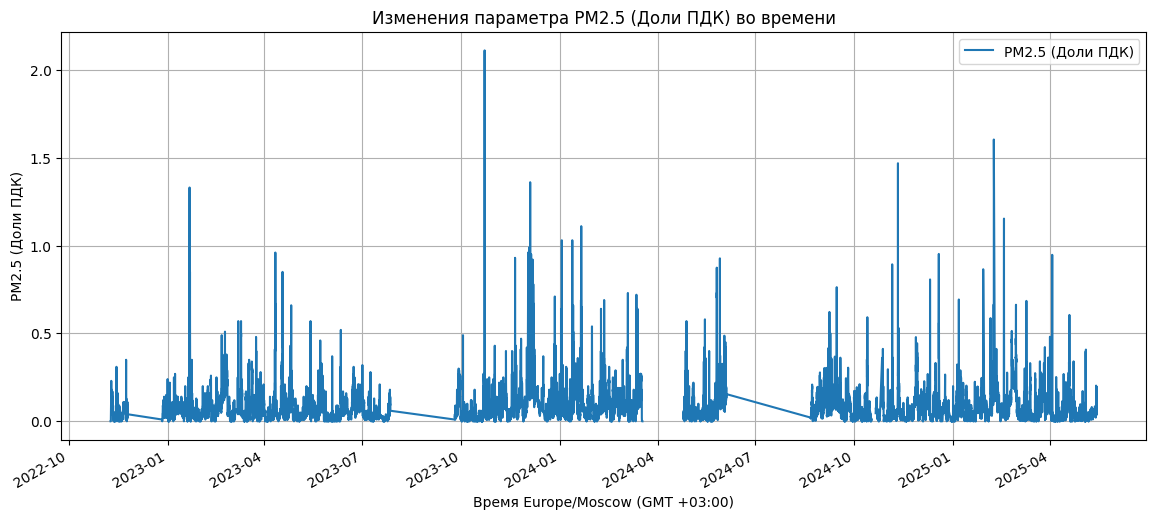

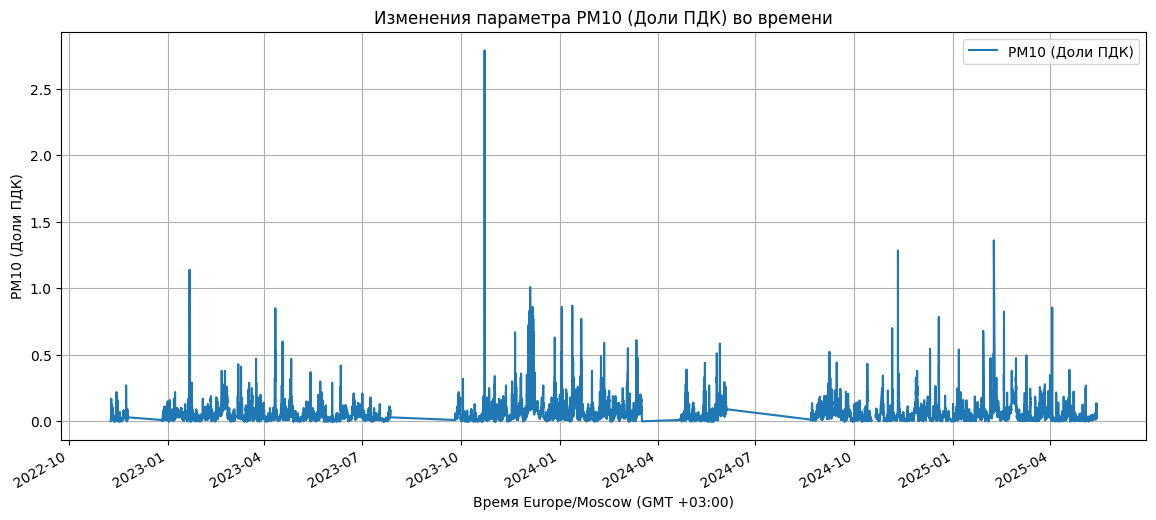

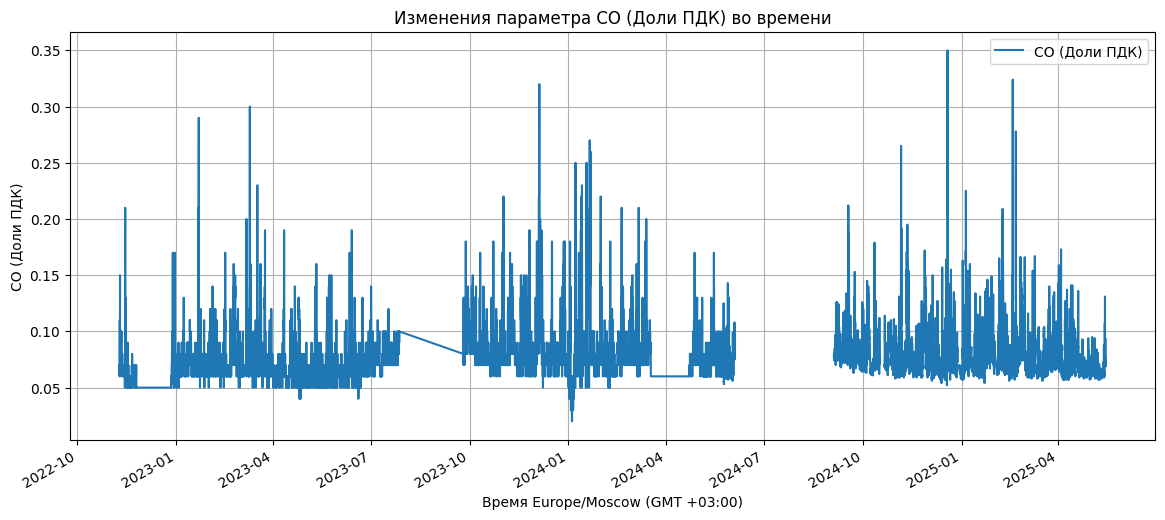

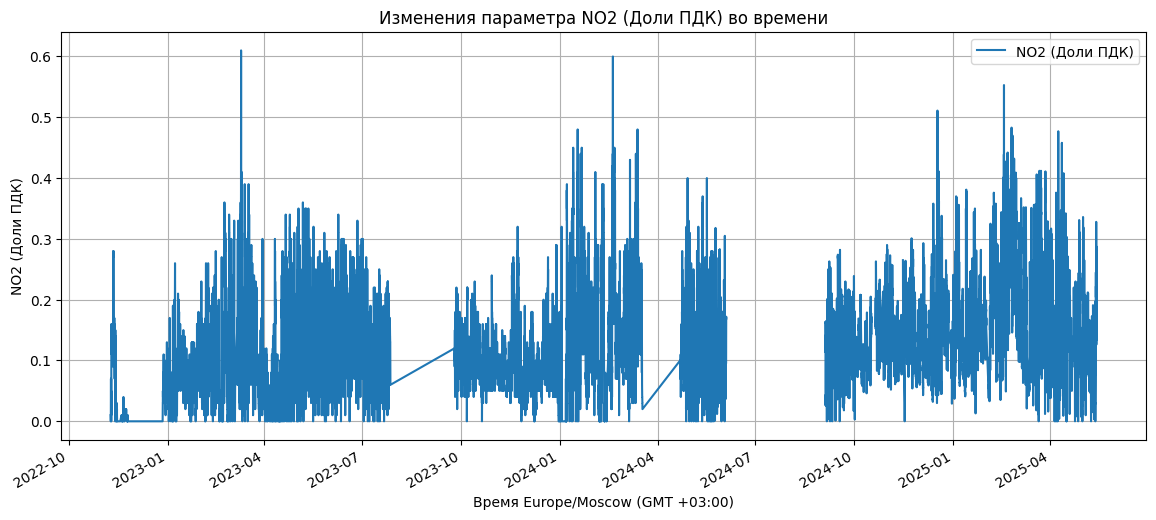

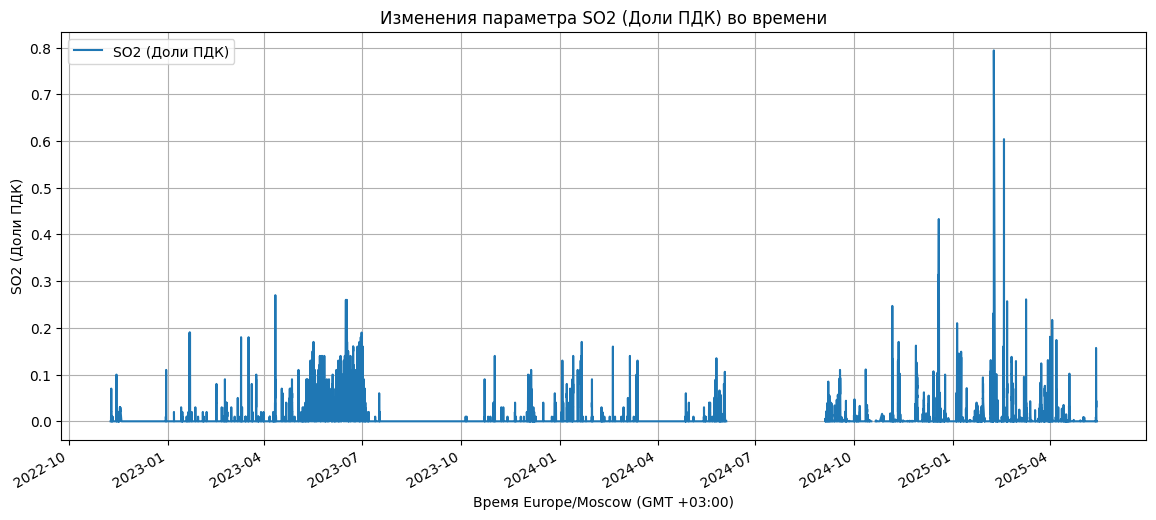

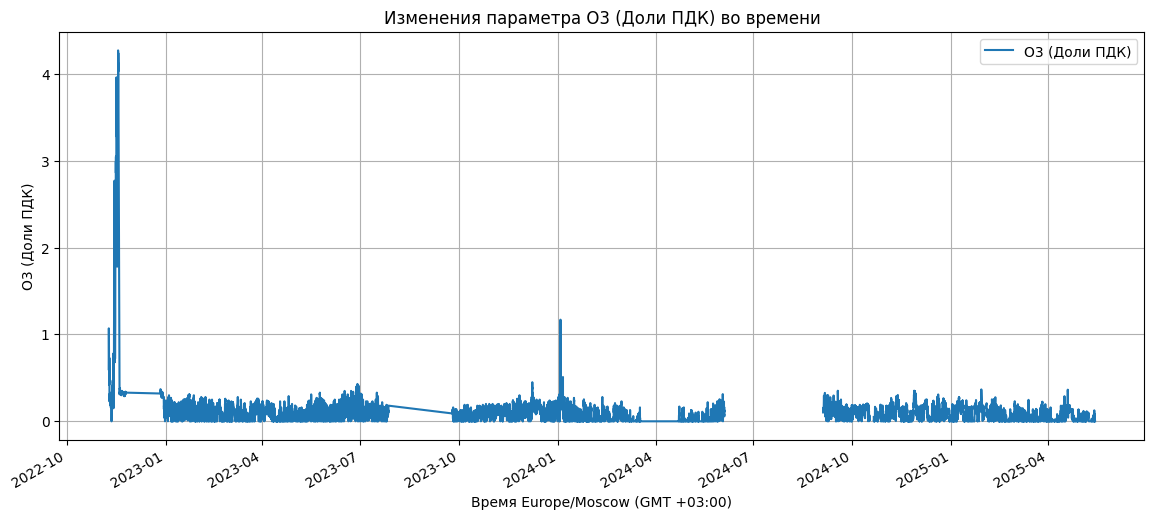

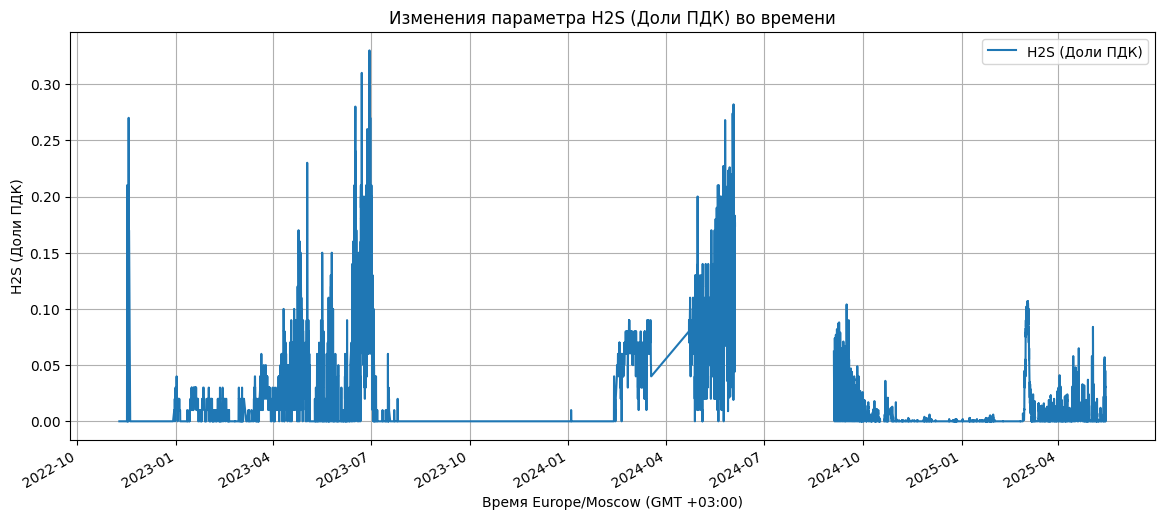

In [25]:
param_list = ['PM2.5 (Доли ПДК)', 'PM10 (Доли ПДК)', 'CO (Доли ПДК)', 
              'NO2 (Доли ПДК)', 'SO2 (Доли ПДК)', 'O3 (Доли ПДК)', 'H2S (Доли ПДК)']
for param_name in param_list:
    df.plot(x='Время Europe/Moscow (GMT +03:00)', y=param_name, figsize=(14,6))
    plt.title(f"Изменения параметра {param_name} во времени")
    plt.ylabel(param_name)
    plt.grid()
    

## Загружаем архив погоды с информацией о направлении ветра

- Направление ветра в столбце DD
- Скорость ветра в столбце Ff

In [26]:
file = os.path.abspath(weather_history_file)
print(file)
df2 = pd.read_excel(file, sheet_name=None, skiprows=6)

c:\Users\domin\Downloads\учёба\project_spring_2025\data\weather_history\26063.17.10.2022.12.05.2025.1.0.0.ru.utf8.00000000.xls


Извлекаем данные с листа `Архив Погоды rp5` и преобразуем данные о времени в тип datetime

In [27]:
df2 = df2['Архив Погоды rp5']
df2['Местное время в Санкт-Петербурге'] = pd.to_datetime(df2['Местное время в Санкт-Петербурге'], format="%d.%m.%Y %H:%M")

Выведем размер датафрейма (число строк, число столбцов)

In [28]:
df2.shape

(7509, 29)

Выводим первые несколько записей собранного набора данных

In [29]:
df2.head(10)

Местное время в Санкт-Петербурге     T     Po      P   Pa     U  \
0              2025-05-12 21:00:00  11.1  761.6  762.0  0.0  39.0   
1              2025-05-12 18:00:00  14.3  761.6  762.0 -0.1  31.0   
2              2025-05-12 15:00:00  14.4  761.7  762.1 -0.1  33.0   
3              2025-05-12 12:00:00  12.8  761.8  762.1 -0.2  40.0   
4              2025-05-12 09:00:00   7.8  762.0  762.4  0.1  60.0   
5              2025-05-12 06:00:00   3.7  761.9  762.3  0.0  72.0   
6              2025-05-12 03:00:00   5.5  761.9  762.3 -0.1  68.0   
7              2025-05-12 00:00:00   8.2  762.0  762.4  0.1  63.0   
8              2025-05-11 21:00:00  10.2  761.9  762.3 -0.1  54.0   
9              2025-05-11 18:00:00  11.7  762.0  762.4 -0.5  51.0   

                                      DD  Ff  ff10  ff3  ...  \
0  Ветер, дующий с северо-северо-востока   1   NaN  NaN  ...   
1         Ветер, дующий с северо-востока   2   NaN  NaN  ...   
2         Ветер, дующий с северо-востока   2   NaN  NaN  ...   
3         Ветер, дующий с северо-востока   2   NaN  NaN  ...   
4  Ветер, дующий с северо-северо-востока   2   NaN  NaN  ...   
5         Ветер, дующий с северо-востока   1   NaN  NaN  ...   
6         Ветер, дующий с северо-востока   2   NaN  NaN  ...   
7  Ветер, дующий с северо-северо-востока   2   NaN  NaN  ...   
8                 Ветер, дующий с севера   3   NaN  NaN  ...   
9                 Ветер, дующий с севера   3   NaN  NaN  ...   

                                                  Cm  \
0                                                NaN   
1                                                NaN   
2  Высококучевых, высокослоистых или слоисто-дожд...   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7  Высококучевых, высокослоистых или слоисто-дожд...   
8  Высококучевые, просвечивающие или плотные в дв...   
9  Высококучевые, просвечивающие или плотные в дв...   

                                                  Ch  VV   Td            RRR  \
0                                                NaN  10 -2.6    Осадков нет   
1                                                NaN  10 -2.7    Осадков нет   
2  Перистые нитевидные, иногда когтевидные, не ра...  10 -1.7            NaN   
3                                                NaN  10 -0.5            NaN   
4                                                NaN  10  0.5    Осадков нет   
5                                                NaN  10 -0.9    Осадков нет   
6                                                NaN  10 -0.1            NaN   
7  Перистые нитевидные, иногда когтевидные, не ра...  10  1.4            NaN   
8  Перистых, перисто-кучевых или перисто-слоистых...  10  1.3  Следы осадков   
9  Перистых, перисто-кучевых или перисто-слоистых...  10  1.7  Следы осадков   

     tR                                                  E   Tg   E'  sss  
0  12.0                                                NaN  NaN  NaN  NaN  
1  12.0                                                NaN  NaN  NaN  NaN  
2   NaN                                                NaN  NaN  NaN  NaN  
3   NaN                                                NaN  NaN  NaN  NaN  
4  12.0  Поверхность почвы сухая (без трещин и без заме...  0.0  NaN  NaN  
5  12.0                                                NaN  NaN  NaN  NaN  
6   NaN                                                NaN  NaN  NaN  NaN  
7   NaN                                                NaN  NaN  NaN  NaN  
8  12.0                                                NaN  NaN  NaN  NaN  
9  12.0                                                NaN  NaN  NaN  NaN  

[10 rows x 29 columns]

Посмотрим на данные о направлении ветра

In [30]:
df2['DD']

0       Ветер, дующий с северо-северо-востока
1              Ветер, дующий с северо-востока
2              Ветер, дующий с северо-востока
3              Ветер, дующий с северо-востока
4       Ветер, дующий с северо-северо-востока
                        ...                  
7504                   Ветер, дующий с запада
7505               Ветер, дующий с юго-запада
7506               Ветер, дующий с юго-запада
7507           Ветер, дующий с юго-юго-запада
7508           Ветер, дующий с юго-юго-запада
Name: DD, Length: 7509, dtype: object

Преобразуем данные о направлении ветра в категориальный тип, чтобы можно было осуществить группировку по этому параметру и посмотрим какие направления ветра как часто встречаются

In [31]:
pd.Categorical(df2['DD']).describe()

counts     freqs
categories                                              
Ветер, дующий с востока                    429  0.057131
Ветер, дующий с востоко-северо-востока     306  0.040751
Ветер, дующий с востоко-юго-востока        663  0.088294
Ветер, дующий с запада                     894  0.119057
Ветер, дующий с западо-северо-запада       290  0.038620
Ветер, дующий с западо-юго-запада          615  0.081902
Ветер, дующий с севера                     272  0.036223
Ветер, дующий с северо-востока             381  0.050739
Ветер, дующий с северо-запада              274  0.036490
Ветер, дующий с северо-северо-востока      216  0.028765
Ветер, дующий с северо-северо-запада       210  0.027966
Ветер, дующий с юга                        662  0.088161
Ветер, дующий с юго-востока                124  0.016514
Ветер, дующий с юго-запада                 797  0.106139
Ветер, дующий с юго-юго-востока            106  0.014116
Ветер, дующий с юго-юго-запада             486  0.064722
Штиль, безветрие                           784  0.104408

Отсортируем данные в таблице по возрастанию времени, чтобы корректно отобразить данные на графиках

In [32]:
df2.sort_values(by=['Местное время в Санкт-Петербурге'], inplace=True)

Построим на одном графике температуру воздуха из двух разных источников данных

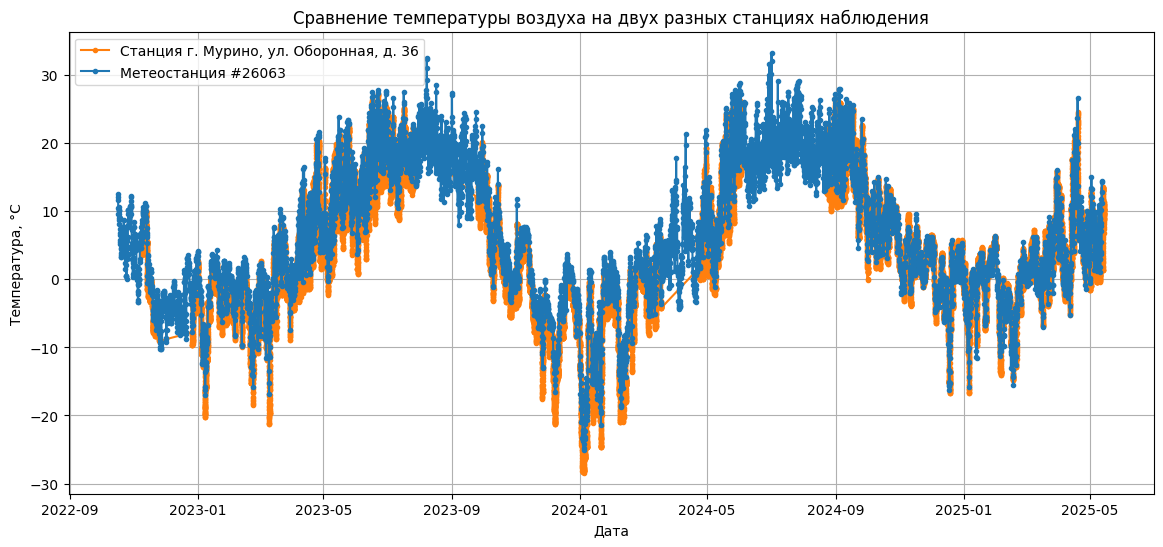

In [33]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df['Время Europe/Moscow (GMT +03:00)'], df['Температура (°C)'], marker='.', color='tab:orange', label='Станция г. Мурино, ул. Оборонная, д. 36')
ax.plot(df2['Местное время в Санкт-Петербурге'], df2['T'], marker='.', color='tab:blue', label='Метеостанция #26063')
ax.set_title('Сравнение температуры воздуха на двух разных станциях наблюдения')
ax.set_xlabel('Дата')
ax.set_ylabel('Температура, °C')
ax.grid()
ax.legend()


Видно что данные по температуре воздуха в целом похоже друг на друга, но небольшие расхождения все же есть. Возможно они вызваны тем что измерения производятся на разных станциях наблюдения.

График скорости ветра

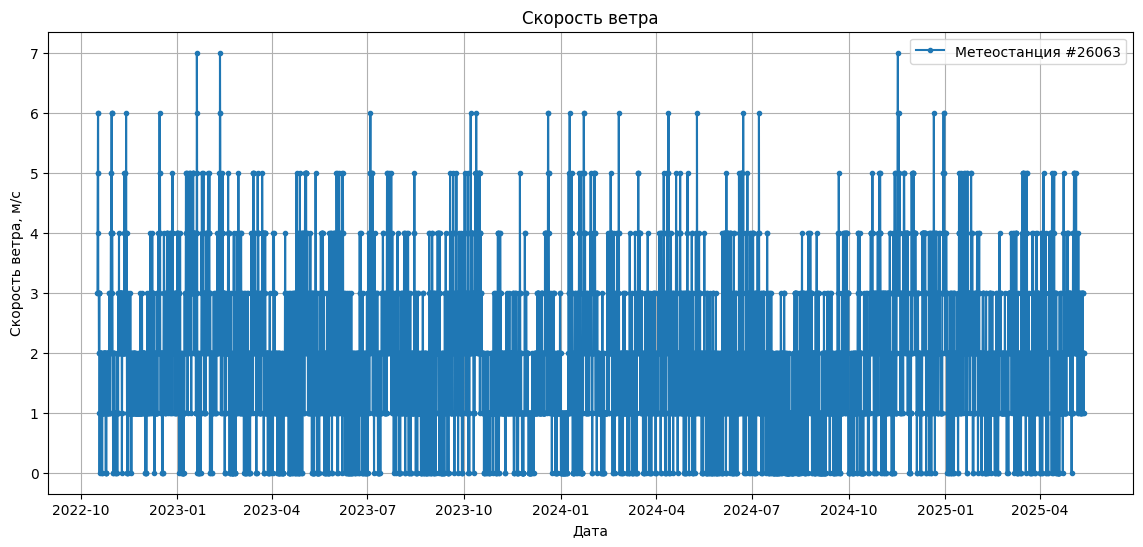

In [34]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df2['Местное время в Санкт-Петербурге'], df2['Ff'], marker='.', color='tab:blue', label='Метеостанция #26063')
ax.set_title('Скорость ветра')
ax.set_xlabel('Дата')
ax.set_ylabel('Скорость ветра, м/с')
ax.grid()
ax.legend()

### Объединяем данные из двух источников на основе столбцов с временем 
в одной таблице данные с интервалом в 20 минут, в другой с интервалом 3 часа. После объединения останутся только те наблюдения для которых есть информация на некоторый момент времени в обоих таблицах



In [35]:
result = pd.merge(df, df2, left_on='Время Europe/Moscow (GMT +03:00)', right_on='Местное время в Санкт-Петербурге', how='inner')

Выведем объединенный датафрейм  
Видно что данные стали с интервалом в 3 часа

In [36]:
result

Время Europe/Moscow (GMT +03:00)  Температура (°C)  Давление (мм рт.ст.)  \
0                 2022-11-09 00:00:00             5.600               756.000   
1                 2022-11-09 03:00:00             4.200               756.000   
2                 2022-11-09 06:00:00             3.700               757.000   
3                 2022-11-09 09:00:00             3.900               760.000   
4                 2022-11-09 12:00:00             4.500               759.000   
...                               ...               ...                   ...   
5429              2025-05-12 09:00:00             5.268               760.415   
5430              2025-05-12 12:00:00             9.630               760.072   
5431              2025-05-12 15:00:00            11.260               760.011   
5432              2025-05-12 18:00:00            11.009               759.878   
5433              2025-05-12 21:00:00             9.850               759.846   

      Влажность (%)  PM2.5 (мкг/м³)  PM2.5 (Доли ПДК)  PM10 (мкг/м³)  \
0            90.000            0.00             0.000           1.00   
1            87.000            0.00             0.000           0.00   
2            89.000            1.00             0.010           1.00   
3            94.000           12.00             0.080          16.00   
4            96.000            6.00             0.040           8.00   
...             ...             ...               ...            ...   
5429         72.463            8.35             0.052          10.45   
5430         48.394            8.05             0.050          10.30   
5431         39.312            7.35             0.046           8.35   
5432         36.426            7.15             0.045           8.40   
5433         39.032            7.90             0.049          10.15   

      PM10 (Доли ПДК)  CO (мкг/м³)  CO (Доли ПДК)  ...  \
0               0.000      327.470          0.070  ...   
1               0.000      286.990          0.060  ...   
2               0.000      287.470          0.060  ...   
3               0.050      501.670          0.100  ...   
4               0.030      354.290          0.070  ...   
...               ...          ...            ...  ...   
5429            0.035      309.968          0.062  ...   
5430            0.034      308.368          0.062  ...   
5431            0.028      300.356          0.060  ...   
5432            0.028      312.322          0.062  ...   
5433            0.034      325.545          0.065  ...   

                                                     Cm  \
0     Высококучевых, высокослоистых или слоисто-дожд...   
1     Высококучевых, высокослоистых или слоисто-дожд...   
2                                                   NaN   
3     Высокослоистые непросвечивающие или слоисто-до...   
4                                                   NaN   
...                                                 ...   
5429                                                NaN   
5430                                                NaN   
5431  Высококучевых, высокослоистых или слоисто-дожд...   
5432                                                NaN   
5433                                                NaN   

                                                     Ch  VV   Td          RRR  \
0     Перистых, перисто-кучевых или перисто-слоистых...  10  4.8          NaN   
1     Перистых, перисто-кучевых или перисто-слоистых...  10  4.0          NaN   
2                                                   NaN  10  3.5          0.3   
3                                                   NaN  10  5.0            3   
4                                                   NaN   4  6.0          NaN   
...                                                 ...  ..  ...          ...   
5429                                                NaN  10  0.5  Осадков нет   
5430                                                NaN  10 -0.5          NaN   
5431  Перистые нитевидные, иногд

Размер таблицы данных после объединения

In [37]:
result.shape

(5434, 47)

Преобразуем столбец с информаццией о направлении ветра в категориальный тип для возможности агрегации данных по этому паарметру

In [38]:
result['DD'] = result['DD'].astype('category')

Анализ зависимости параметра 'PM2.5 (Доли ПДК)' от направления ветра

In [44]:
pd.pivot_table(result, index='DD', values='PM2.5 (Доли ПДК)', aggfunc=['mean', 'median', 'count'], observed=False)

mean           median  \
                                       PM2.5 (Доли ПДК) PM2.5 (Доли ПДК)   
DD                                                                         
Ветер, дующий с востока                        0.084208           0.0600   
Ветер, дующий с востоко-северо-востока         0.049610           0.0300   
Ветер, дующий с востоко-юго-востока            0.103089           0.0855   
Ветер, дующий с запада                         0.047164           0.0230   
Ветер, дующий с западо-северо-запада           0.053311           0.0240   
Ветер, дующий с западо-юго-запада              0.051853           0.0310   
Ветер, дующий с севера                         0.046762           0.0300   
Ветер, дующий с северо-востока                 0.039233           0.0220   
Ветер, дующий с северо-запада                  0.049740           0.0300   
Ветер, дующий с северо-северо-востока          0.059898           0.0300   
Ветер, дующий с северо-северо-запада           0.048291           0.0200   
Ветер, дующий с юга                            0.098864           0.0800   
Ветер, дующий с юго-востока                    0.115571           0.0915   
Ветер, дующий с юго-запада                     0.079377           0.0500   
Ветер, дующий с юго-юго-востока                0.126658           0.1010   
Ветер, дующий с юго-юго-запада                 0.090409           0.0700   
Штиль, безветрие                               0.144259           0.1100   

                                                  count  
                                       PM2.5 (Доли ПДК)  
DD                                                       
Ветер, дующий с востока                             317  
Ветер, дующий с востоко-северо-востока              210  
Ветер, дующий с востоко-юго-востока                 436  
Ветер, дующий с запада                              640  
Ветер, дующий с западо-северо-запада                193  
Ветер, дующий с западо-юго-запада                   448  
Ветер, дующий с севера                              223  
Ветер, дующий с северо-востока                      287  
Ветер, дующий с северо-запада                       208  
Ветер, дующий с северо-северо-востока               167  
Ветер, дующий с северо-северо-запада                158  
Ветер, дующий с юга                                 470  
Ветер, дующий с юго-востока                          84  
Ветер, дующий с юго-запада                          571  
Ветер, дующий с юго-юго-востока                      73  
Ветер, дующий с юго-юго-запада                      357  
Штиль, безветрие                                    541

C:\Users\domin\AppData\Local\Temp\ipykernel_2868\9218767.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


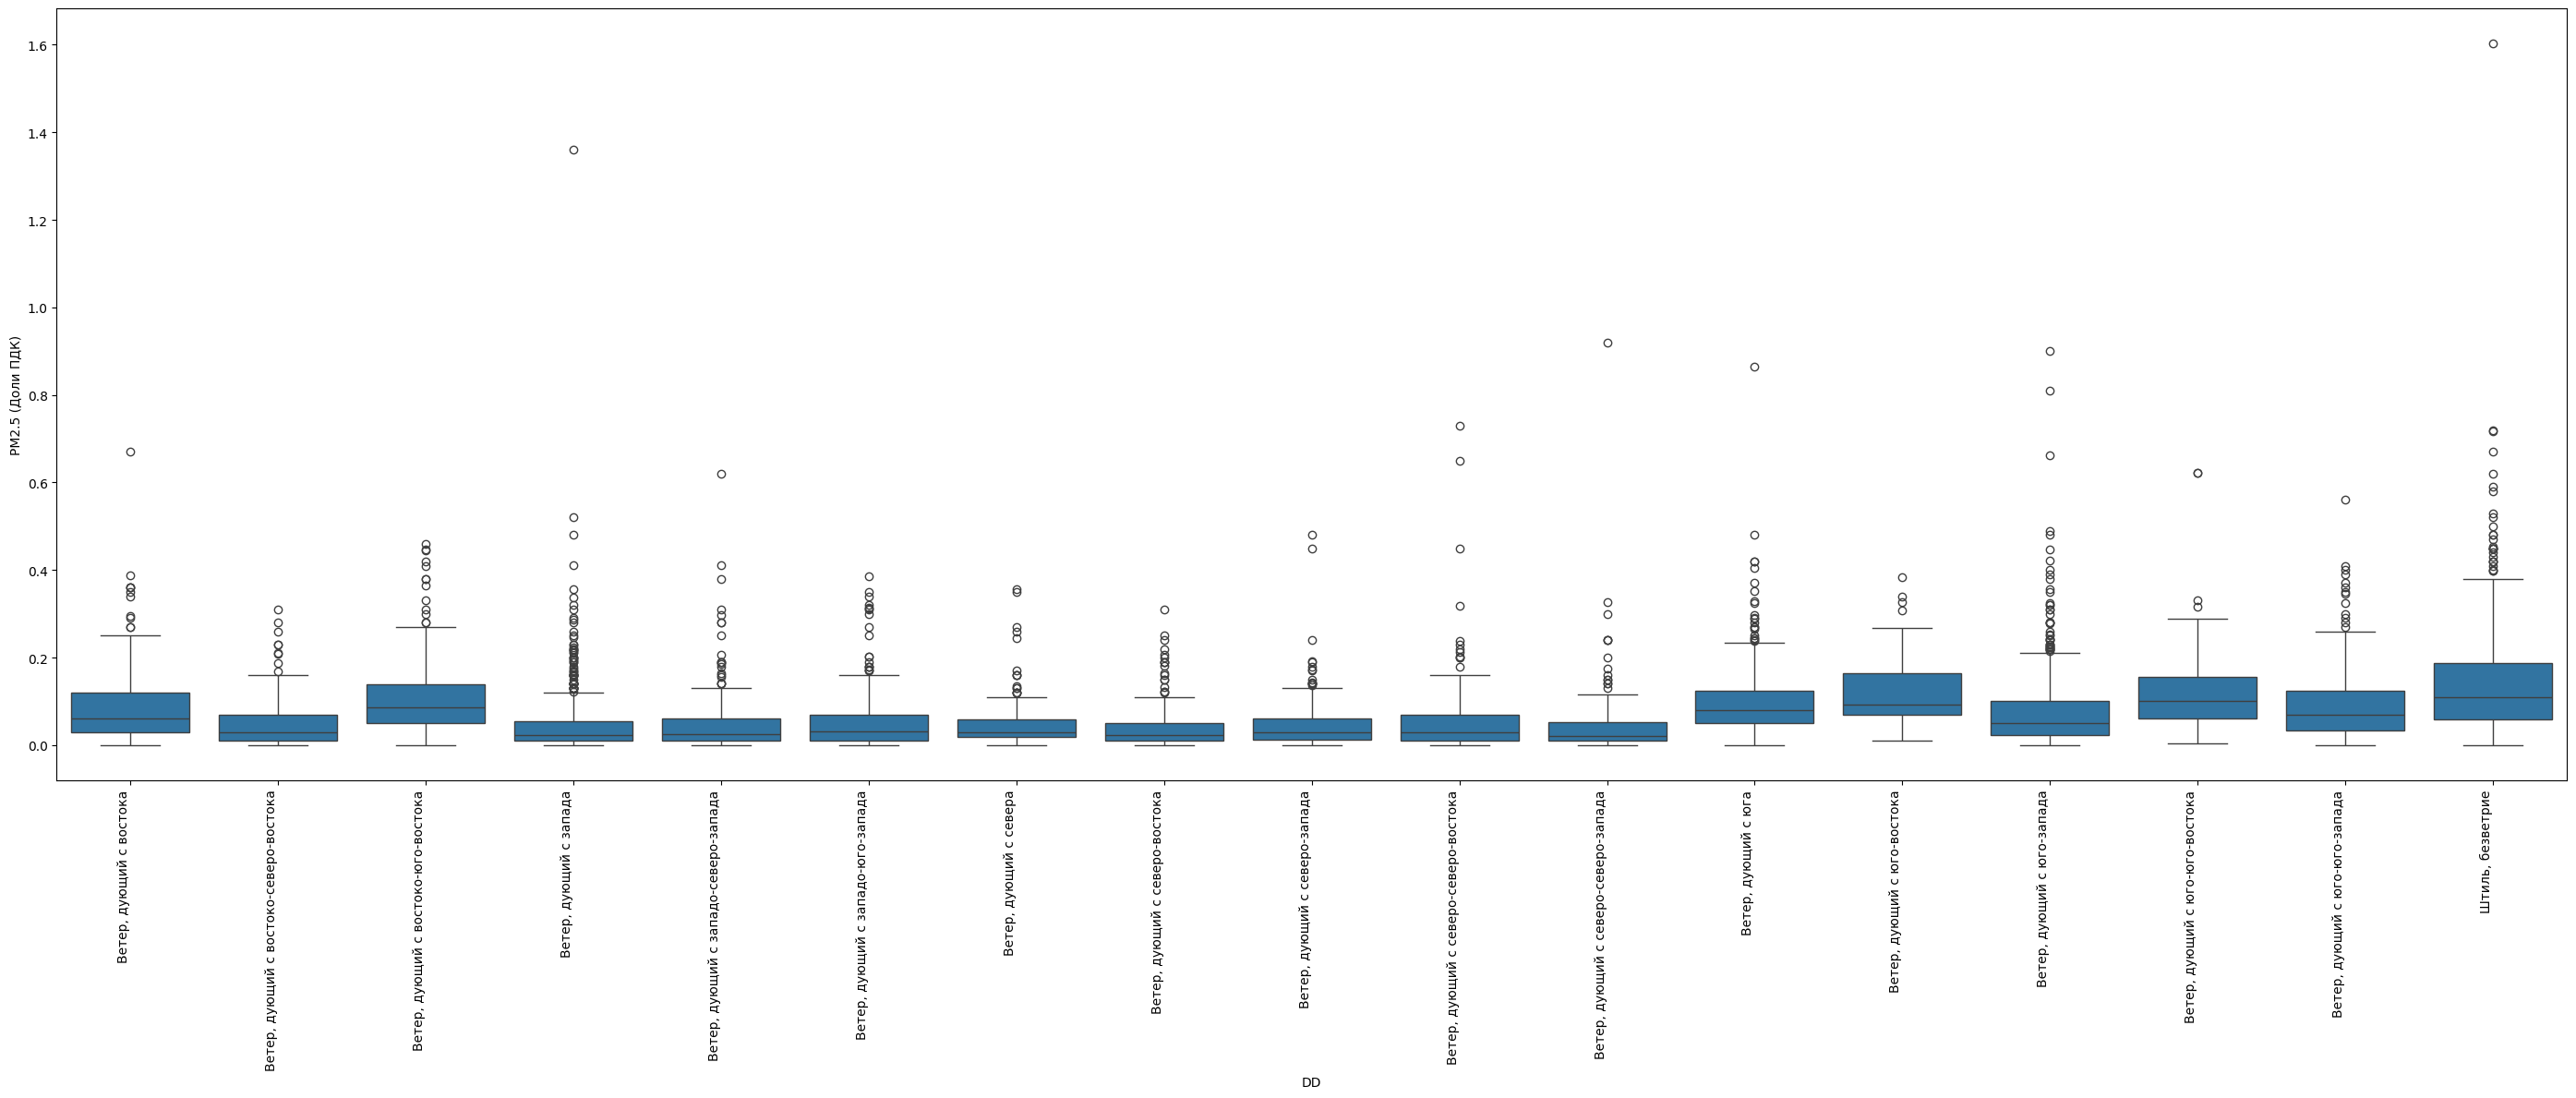

In [40]:
plt.figure(figsize=(28, 12))  # Увеличиваем размер графика
ax = sns.boxplot(x='DD', y='PM2.5 (Доли ПДК)', data=result, orient='v')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()  # Автоматическая подгонка отступов
plt.show()

Анализ зависимости параметра 'PM10 (Доли ПДК)' от направления ветра

In [43]:
pd.pivot_table(result, index='DD', values='PM10 (Доли ПДК)', aggfunc=['mean', 'median', 'count'], observed=False)

mean          median  \
                                       PM10 (Доли ПДК) PM10 (Доли ПДК)   
DD                                                                       
Ветер, дующий с востока                       0.058589          0.0400   
Ветер, дующий с востоко-северо-востока        0.033434          0.0200   
Ветер, дующий с востоко-юго-востока           0.069438          0.0550   
Ветер, дующий с запада                        0.032514          0.0195   
Ветер, дующий с западо-северо-запада          0.037062          0.0180   
Ветер, дующий с западо-юго-запада             0.035520          0.0200   
Ветер, дующий с севера                        0.031363          0.0200   
Ветер, дующий с северо-востока                0.026911          0.0190   
Ветер, дующий с северо-запада                 0.034587          0.0200   
Ветер, дующий с северо-северо-востока         0.043515          0.0200   
Ветер, дующий с северо-северо-запада          0.033424          0.0165   
Ветер, дующий с юга                           0.067660          0.0535   
Ветер, дующий с юго-востока                   0.075952          0.0600   
Ветер, дующий с юго-запада                    0.054257          0.0300   
Ветер, дующий с юго-юго-востока               0.087905          0.0675   
Ветер, дующий с юго-юго-запада                0.060970          0.0465   
Штиль, безветрие                              0.102353          0.0800   

                                                 count  
                                       PM10 (Доли ПДК)  
DD                                                      
Ветер, дующий с востока                            319  
Ветер, дующий с востоко-северо-востока             212  
Ветер, дующий с востоко-юго-востока                438  
Ветер, дующий с запада                             640  
Ветер, дующий с западо-северо-запада               193  
Ветер, дующий с западо-юго-запада                  448  
Ветер, дующий с севера                             223  
Ветер, дующий с северо-востока                     292  
Ветер, дующий с северо-запада                      208  
Ветер, дующий с северо-северо-востока              167  
Ветер, дующий с северо-северо-запада               158  
Ветер, дующий с юга                                474  
Ветер, дующий с юго-востока                         84  
Ветер, дующий с юго-запада                         572  
Ветер, дующий с юго-юго-востока                     74  
Ветер, дующий с юго-юго-запада                     364  
Штиль, безветрие                                   541

C:\Users\domin\AppData\Local\Temp\ipykernel_2868\3704036163.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


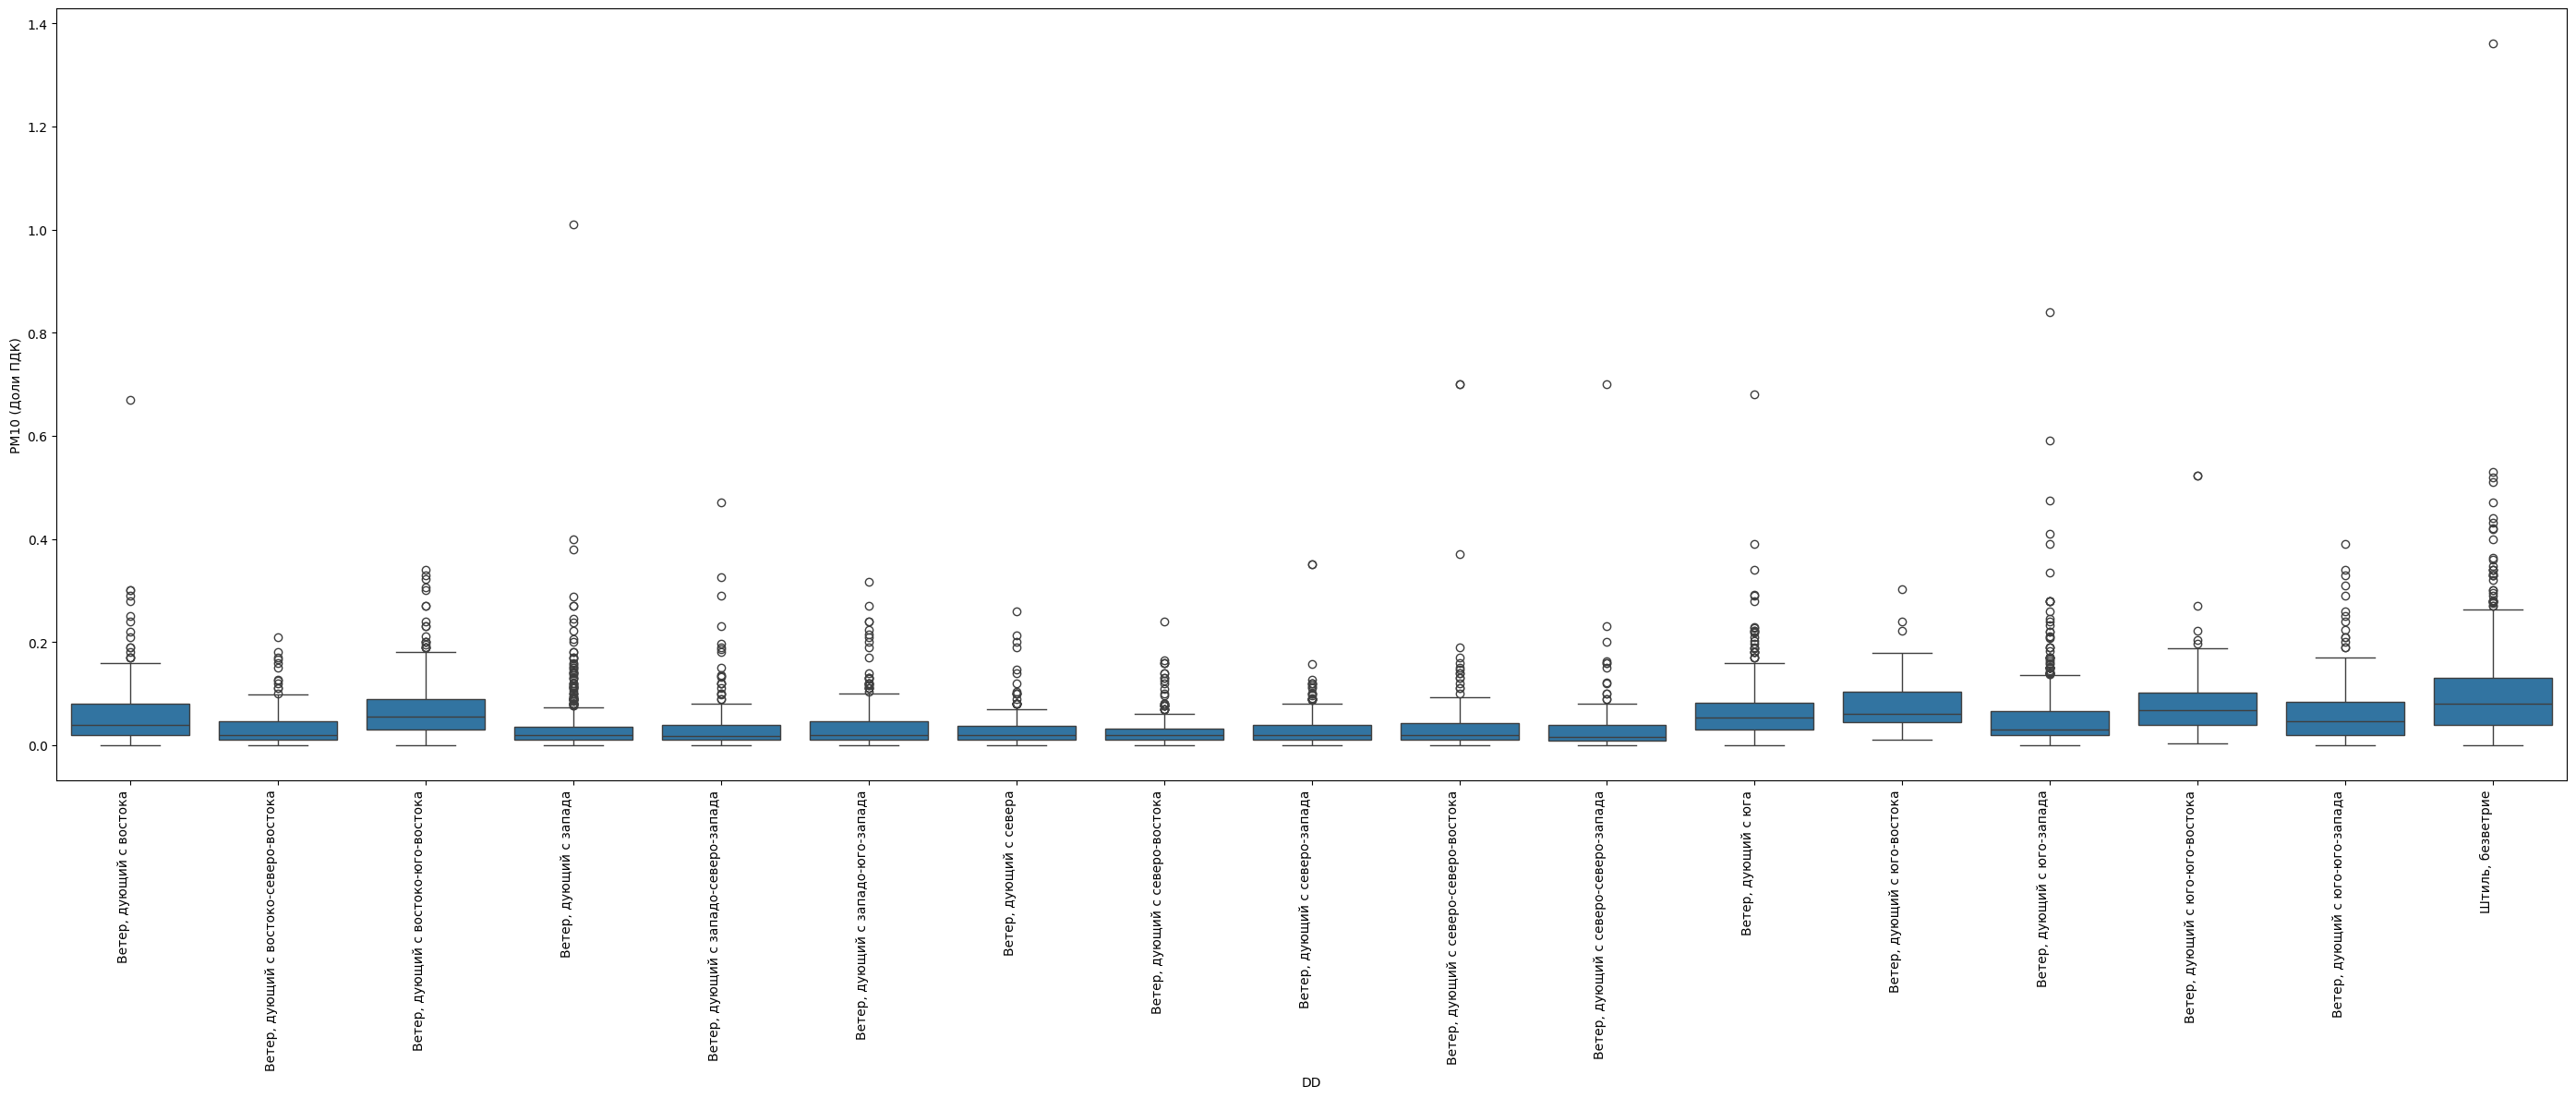

In [42]:
plt.figure(figsize=(28, 12))  # Увеличиваем размер графика
# ax = sns.boxplot(x='category', y='value', data=df)
ax = sns.boxplot(x='DD', y='PM10 (Доли ПДК)', data=result, orient='v')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()  # Автоматическая подгонка отступов
plt.show()

В целом видно, что в зависимости от направления ветра значения показателей загрязнения воздуха меняются. Нужно изучить это влияние подробнее..

### Построим графики среднего значения параметров качества воздуха в зависимости от направления ветра

Список категорий с направлением ветра

In [45]:
list(result.DD.unique())

['Ветер, дующий с запада',
 'Штиль, безветрие',
 'Ветер, дующий с юга',
 'Ветер, дующий с востоко-юго-востока',
 'Ветер, дующий с юго-запада',
 'Ветер, дующий с юго-юго-запада',
 'Ветер, дующий с западо-юго-запада',
 'Ветер, дующий с северо-запада',
 'Ветер, дующий с северо-северо-запада',
 'Ветер, дующий с севера',
 'Ветер, дующий с северо-северо-востока',
 'Ветер, дующий с востока',
 'Ветер, дующий с северо-востока',
 'Ветер, дующий с востоко-северо-востока',
 'Ветер, дующий с юго-востока',
 'Ветер, дующий с юго-юго-востока',
 'Ветер, дующий с западо-северо-запада']

Для визуализации на графике поставим в соответвие каждому направлению ветра угол в градусах

In [46]:
wind_directions_degrees = {
    'Ветер, дующий с севера': 0,
    'Ветер, дующий с северо-северо-востока': 22.5,
    'Ветер, дующий с северо-востока': 45,
    'Ветер, дующий с востоко-северо-востока': 67.5,
    'Ветер, дующий с востока': 90,
    'Ветер, дующий с востоко-юго-востока': 112.5,
    'Ветер, дующий с юго-востока': 135,
    'Ветер, дующий с юго-юго-востока': 157.5,
    'Ветер, дующий с юга': 180,
    'Ветер, дующий с юго-юго-запада': 202.5,
    'Ветер, дующий с юго-запада': 225,
    'Ветер, дующий с западо-юго-запада': 247.5,
    'Ветер, дующий с запада': 270,
    'Ветер, дующий с западо-северо-запада': 292.5,
    'Ветер, дующий с северо-запада': 315,
    'Ветер, дующий с северо-северо-запада': 337.5,
    'Штиль, безветрие': None
}

mean           median  \
                                       PM2.5 (Доли ПДК) PM2.5 (Доли ПДК)   
DD                                                                         
Ветер, дующий с востока                        0.084208           0.0600   
Ветер, дующий с востоко-северо-востока         0.049610           0.0300   
Ветер, дующий с востоко-юго-востока            0.103089           0.0855   
Ветер, дующий с запада                         0.047164           0.0230   
Ветер, дующий с западо-северо-запада           0.053311           0.0240   
Ветер, дующий с западо-юго-запада              0.051853           0.0310   
Ветер, дующий с севера                         0.046762           0.0300   
Ветер, дующий с северо-востока                 0.039233           0.0220   
Ветер, дующий с северо-запада                  0.049740           0.0300   
Ветер, дующий с северо-северо-востока          0.059898           0.0300   
Ветер, дующий с северо-северо-запада           0.048291           0.0200   
Ветер, дующий с юга                            0.098864           0.0800   
Ветер, дующий с юго-востока                    0.115571           0.0915   
Ветер, дующий с юго-запада                     0.079377           0.0500   
Ветер, дующий с юго-юго-востока                0.126658           0.1010   
Ветер, дующий с юго-юго-запада                 0.090409           0.0700   
Штиль, безветрие                               0.144259           0.1100   

                                                  count Направление в градусах  
                                       PM2.5 (Доли ПДК)                         
DD                                                                              
Ветер, дующий с востока                             317                   90.0  
Ветер, дующий с востоко-северо-востока              210                   67.5  
Ветер, дующий с востоко-юго-востока                 436                  112.5  
Ветер, дующий с запада                              640                  270.0  
Ветер, дующий с западо-северо-запада                193                  292.5  
Ветер, дующий с западо-юго-запада                   448                  247.5  
Ветер, дующий с севера                              223                    0.0  
Ветер, дующий с северо-востока                      287                   45.0  
Ветер, дующий с северо-запада                       208                  315.0  
Ветер, дующий с северо-северо-востока               167                   22.5  
Ветер, дующий с северо-северо-запада                158                  337.5  
Ветер, дующий с юга                                 470                  180.0  
Ветер, дующий с юго-востока                          84                  135.0  
Ветер, дующий с юго-запада                          571                  225.0  
Ветер, дующий с юго-юго-востока                      73                  157.5  
Ветер, дующий с юго-юго-запада                      357                  202.5  
Штиль, безветрие                                    541                    NaN

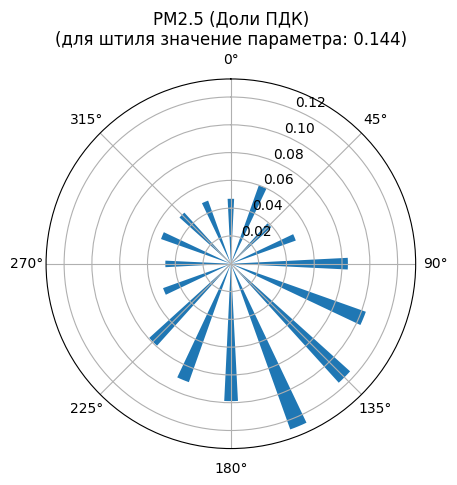

mean          median  \
                                       PM10 (Доли ПДК) PM10 (Доли ПДК)   
DD                                                                       
Ветер, дующий с востока                       0.058589          0.0400   
Ветер, дующий с востоко-северо-востока        0.033434          0.0200   
Ветер, дующий с востоко-юго-востока           0.069438          0.0550   
Ветер, дующий с запада                        0.032514          0.0195   
Ветер, дующий с западо-северо-запада          0.037062          0.0180   
Ветер, дующий с западо-юго-запада             0.035520          0.0200   
Ветер, дующий с севера                        0.031363          0.0200   
Ветер, дующий с северо-востока                0.026911          0.0190   
Ветер, дующий с северо-запада                 0.034587          0.0200   
Ветер, дующий с северо-северо-востока         0.043515          0.0200   
Ветер, дующий с северо-северо-запада          0.033424          0.0165   
Ветер, дующий с юга                           0.067660          0.0535   
Ветер, дующий с юго-востока                   0.075952          0.0600   
Ветер, дующий с юго-запада                    0.054257          0.0300   
Ветер, дующий с юго-юго-востока               0.087905          0.0675   
Ветер, дующий с юго-юго-запада                0.060970          0.0465   
Штиль, безветрие                              0.102353          0.0800   

                                                 count Направление в градусах  
                                       PM10 (Доли ПДК)                         
DD                                                                             
Ветер, дующий с востока                            319                   90.0  
Ветер, дующий с востоко-северо-востока             212                   67.5  
Ветер, дующий с востоко-юго-востока                438                  112.5  
Ветер, дующий с запада                             640                  270.0  
Ветер, дующий с западо-северо-запада               193                  292.5  
Ветер, дующий с западо-юго-запада                  448                  247.5  
Ветер, дующий с севера                             223                    0.0  
Ветер, дующий с северо-востока                     292                   45.0  
Ветер, дующий с северо-запада                      208                  315.0  
Ветер, дующий с северо-северо-востока              167                   22.5  
Ветер, дующий с северо-северо-запада               158                  337.5  
Ветер, дующий с юга                                474                  180.0  
Ветер, дующий с юго-востока                         84                  135.0  
Ветер, дующий с юго-запада                         572                  225.0  
Ветер, дующий с юго-юго-востока                     74                  157.5  
Ветер, дующий с юго-юго-запада                     364                  202.5  
Штиль, безветрие                                   541                    NaN

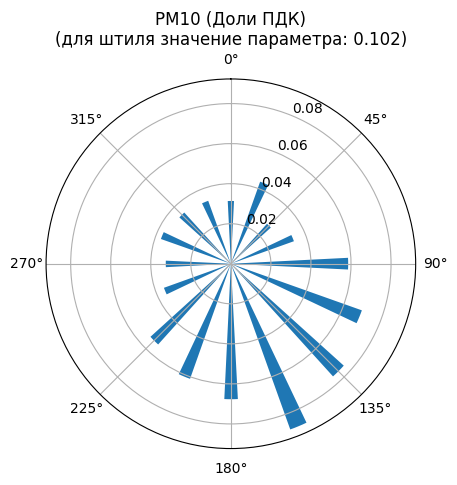

mean        median  \
                                       CO (Доли ПДК) CO (Доли ПДК)   
DD                                                                   
Ветер, дующий с востока                     0.068508        0.0700   
Ветер, дующий с востоко-северо-востока      0.063722        0.0605   
Ветер, дующий с востоко-юго-востока         0.072274        0.0700   
Ветер, дующий с запада                      0.074060        0.0700   
Ветер, дующий с западо-северо-запада        0.074222        0.0700   
Ветер, дующий с западо-юго-запада           0.075448        0.0700   
Ветер, дующий с севера                      0.067874        0.0660   
Ветер, дующий с северо-востока              0.064205        0.0610   
Ветер, дующий с северо-запада               0.074146        0.0700   
Ветер, дующий с северо-северо-востока       0.067079        0.0640   
Ветер, дующий с северо-северо-запада        0.069038        0.0670   
Ветер, дующий с юга                         0.084215        0.0800   
Ветер, дующий с юго-востока                 0.077605        0.0760   
Ветер, дующий с юго-запада                  0.082061        0.0790   
Ветер, дующий с юго-юго-востока             0.081070        0.0780   
Ветер, дующий с юго-юго-запада              0.084980        0.0800   
Штиль, безветрие                            0.087962        0.0800   

                                               count Направление в градусах  
                                       CO (Доли ПДК)                         
DD                                                                           
Ветер, дующий с востока                          315                   90.0  
Ветер, дующий с востоко-северо-востока           212                   67.5  
Ветер, дующий с востоко-юго-востока              431                  112.5  
Ветер, дующий с запада                           630                  270.0  
Ветер, дующий с западо-северо-запада             180                  292.5  
Ветер, дующий с западо-юго-запада                440                  247.5  
Ветер, дующий с севера                           223                    0.0  
Ветер, дующий с северо-востока                   288                   45.0  
Ветер, дующий с северо-запада                    205                  315.0  
Ветер, дующий с северо-северо-востока            164                   22.5  
Ветер, дующий с северо-северо-запада             158                  337.5  
Ветер, дующий с юга                              451                  180.0  
Ветер, дующий с юго-востока                       81                  135.0  
Ветер, дующий с юго-запада                       558                  225.0  
Ветер, дующий с юго-юго-востока                   71                  157.5  
Ветер, дующий с юго-юго-запада                   358                  202.5  
Штиль, безветрие                                 525                    NaN

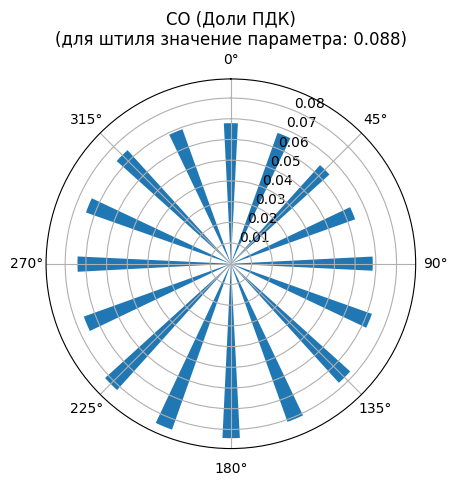

mean         median  \
                                       NO2 (Доли ПДК) NO2 (Доли ПДК)   
DD                                                                     
Ветер, дующий с востока                      0.075314         0.0730   
Ветер, дующий с востоко-северо-востока       0.061099         0.0600   
Ветер, дующий с востоко-юго-востока          0.097921         0.0900   
Ветер, дующий с запада                       0.131767         0.1285   
Ветер, дующий с западо-северо-запада         0.137744         0.1215   
Ветер, дующий с западо-юго-запада            0.135757         0.1300   
Ветер, дующий с севера                       0.091309         0.0900   
Ветер, дующий с северо-востока               0.060847         0.0580   
Ветер, дующий с северо-запада                0.125590         0.1200   
Ветер, дующий с северо-северо-востока        0.079299         0.0720   
Ветер, дующий с северо-северо-запада         0.097601         0.0900   
Ветер, дующий с юга                          0.179534         0.1700   
Ветер, дующий с юго-востока                  0.147605         0.1450   
Ветер, дующий с юго-запада                   0.153473         0.1440   
Ветер, дующий с юго-юго-востока              0.157268         0.1500   
Ветер, дующий с юго-юго-запада               0.168874         0.1600   
Штиль, безветрие                             0.154192         0.1500   

                                                count Направление в градусах  
                                       NO2 (Доли ПДК)                         
DD                                                                            
Ветер, дующий с востока                           315                   90.0  
Ветер, дующий с востоко-северо-востока            212                   67.5  
Ветер, дующий с востоко-юго-востока               431                  112.5  
Ветер, дующий с запада                            630                  270.0  
Ветер, дующий с западо-северо-запада              180                  292.5  
Ветер, дующий с западо-юго-запада                 440                  247.5  
Ветер, дующий с севера                            223                    0.0  
Ветер, дующий с северо-востока                    288                   45.0  
Ветер, дующий с северо-запада                     205                  315.0  
Ветер, дующий с северо-северо-востока             164                   22.5  
Ветер, дующий с северо-северо-запада              158                  337.5  
Ветер, дующий с юга                               451                  180.0  
Ветер, дующий с юго-востока                        81                  135.0  
Ветер, дующий с юго-запада                        558                  225.0  
Ветер, дующий с юго-юго-востока                    71                  157.5  
Ветер, дующий с юго-юго-запада                    358                  202.5  
Штиль, безветрие                                  525                    NaN

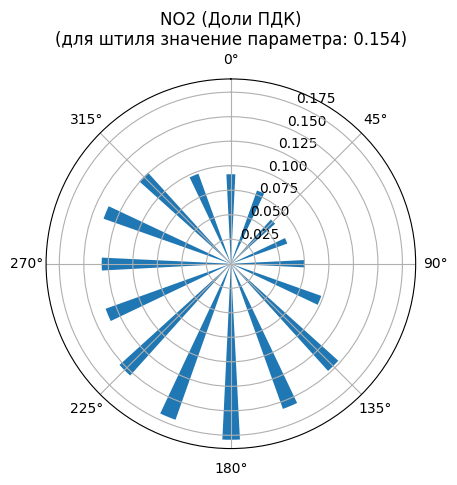

mean         median  \
                                       SO2 (Доли ПДК) SO2 (Доли ПДК)   
DD                                                                     
Ветер, дующий с востока                      0.004298            0.0   
Ветер, дующий с востоко-северо-востока       0.003759            0.0   
Ветер, дующий с востоко-юго-востока          0.003267            0.0   
Ветер, дующий с запада                       0.006270            0.0   
Ветер, дующий с западо-северо-запада         0.004628            0.0   
Ветер, дующий с западо-юго-запада            0.005898            0.0   
Ветер, дующий с севера                       0.003883            0.0   
Ветер, дующий с северо-востока               0.002646            0.0   
Ветер, дующий с северо-запада                0.004293            0.0   
Ветер, дующий с северо-северо-востока        0.005409            0.0   
Ветер, дующий с северо-северо-запада         0.003506            0.0   
Ветер, дующий с юга                          0.004031            0.0   
Ветер, дующий с юго-востока                  0.006704            0.0   
Ветер, дующий с юго-запада                   0.005968            0.0   
Ветер, дующий с юго-юго-востока              0.005141            0.0   
Ветер, дующий с юго-юго-запада               0.005905            0.0   
Штиль, безветрие                             0.022166            0.0   

                                                count Направление в градусах  
                                       SO2 (Доли ПДК)                         
DD                                                                            
Ветер, дующий с востока                           315                   90.0  
Ветер, дующий с востоко-северо-востока            212                   67.5  
Ветер, дующий с востоко-юго-востока               431                  112.5  
Ветер, дующий с запада                            630                  270.0  
Ветер, дующий с западо-северо-запада              180                  292.5  
Ветер, дующий с западо-юго-запада                 440                  247.5  
Ветер, дующий с севера                            223                    0.0  
Ветер, дующий с северо-востока                    288                   45.0  
Ветер, дующий с северо-запада                     205                  315.0  
Ветер, дующий с северо-северо-востока             164                   22.5  
Ветер, дующий с северо-северо-запада              158                  337.5  
Ветер, дующий с юга                               451                  180.0  
Ветер, дующий с юго-востока                        81                  135.0  
Ветер, дующий с юго-запада                        558                  225.0  
Ветер, дующий с юго-юго-востока                    71                  157.5  
Ветер, дующий с юго-юго-запада                    358                  202.5  
Штиль, безветрие                                  525                    NaN

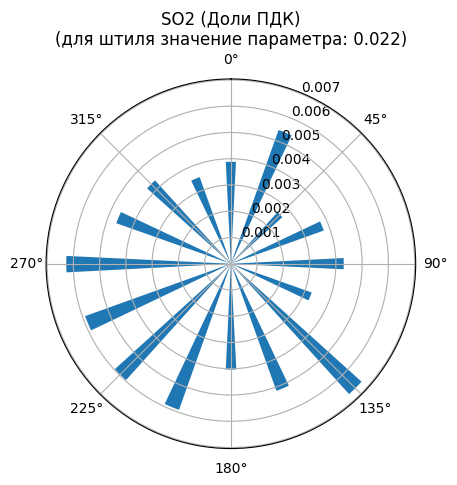

mean        median  \
                                       O3 (Доли ПДК) O3 (Доли ПДК)   
DD                                                                   
Ветер, дующий с востока                     0.170444        0.1410   
Ветер, дующий с востоко-северо-востока      0.199745        0.1130   
Ветер, дующий с востоко-юго-востока         0.127719        0.1300   
Ветер, дующий с запада                      0.073856        0.0575   
Ветер, дующий с западо-северо-запада        0.057694        0.0300   
Ветер, дующий с западо-юго-запада           0.082543        0.0695   
Ветер, дующий с севера                      0.149202        0.0750   
Ветер, дующий с северо-востока              0.126424        0.1135   
Ветер, дующий с северо-запада               0.141376        0.0600   
Ветер, дующий с северо-северо-востока       0.196665        0.0900   
Ветер, дующий с северо-северо-запада        0.095589        0.0900   
Ветер, дующий с юга                         0.066951        0.0220   
Ветер, дующий с юго-востока                 0.091790        0.0800   
Ветер, дующий с юго-запада                  0.066102        0.0410   
Ветер, дующий с юго-юго-востока             0.085746        0.0510   
Ветер, дующий с юго-юго-запада              0.055726        0.0200   
Штиль, безветрие                            0.102560        0.0700   

                                               count Направление в градусах  
                                       O3 (Доли ПДК)                         
DD                                                                           
Ветер, дующий с востока                          315                   90.0  
Ветер, дующий с востоко-северо-востока           212                   67.5  
Ветер, дующий с востоко-юго-востока              431                  112.5  
Ветер, дующий с запада                           630                  270.0  
Ветер, дующий с западо-северо-запада             180                  292.5  
Ветер, дующий с западо-юго-запада                440                  247.5  
Ветер, дующий с севера                           223                    0.0  
Ветер, дующий с северо-востока                   288                   45.0  
Ветер, дующий с северо-запада                    205                  315.0  
Ветер, дующий с северо-северо-востока            164                   22.5  
Ветер, дующий с северо-северо-запада             158                  337.5  
Ветер, дующий с юга                              451                  180.0  
Ветер, дующий с юго-востока                       81                  135.0  
Ветер, дующий с юго-запада                       558                  225.0  
Ветер, дующий с юго-юго-востока                   71                  157.5  
Ветер, дующий с юго-юго-запада                   358                  202.5  
Штиль, безветрие                                 525                    NaN

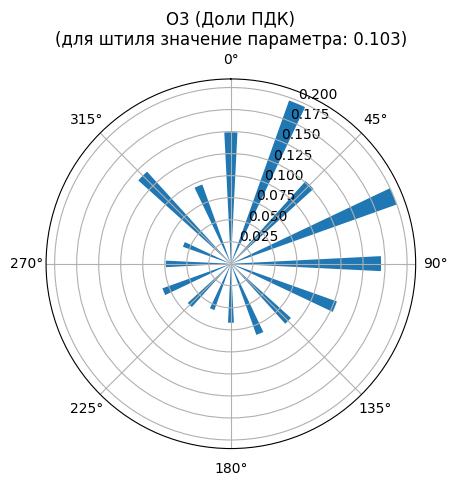

mean         median  \
                                       H2S (Доли ПДК) H2S (Доли ПДК)   
DD                                                                     
Ветер, дующий с востока                      0.019422         0.0000   
Ветер, дующий с востоко-северо-востока       0.029371         0.0005   
Ветер, дующий с востоко-юго-востока          0.019787         0.0000   
Ветер, дующий с запада                       0.018104         0.0000   
Ветер, дующий с западо-северо-запада         0.016011         0.0000   
Ветер, дующий с западо-юго-запада            0.017932         0.0000   
Ветер, дующий с севера                       0.017856         0.0000   
Ветер, дующий с северо-востока               0.020087         0.0000   
Ветер, дующий с северо-запада                0.014132         0.0000   
Ветер, дующий с северо-северо-востока        0.025671         0.0000   
Ветер, дующий с северо-северо-запада         0.011551         0.0000   
Ветер, дующий с юга                          0.015858         0.0000   
Ветер, дующий с юго-востока                  0.037025         0.0100   
Ветер, дующий с юго-запада                   0.015976         0.0000   
Ветер, дующий с юго-юго-востока              0.017704         0.0000   
Ветер, дующий с юго-юго-запада               0.015429         0.0000   
Штиль, безветрие                             0.033227         0.0030   

                                                count Направление в градусах  
                                       H2S (Доли ПДК)                         
DD                                                                            
Ветер, дующий с востока                           315                   90.0  
Ветер, дующий с востоко-северо-востока            210                   67.5  
Ветер, дующий с востоко-юго-востока               431                  112.5  
Ветер, дующий с запада                            628                  270.0  
Ветер, дующий с западо-северо-запада              180                  292.5  
Ветер, дующий с западо-юго-запада                 439                  247.5  
Ветер, дующий с севера                            222                    0.0  
Ветер, дующий с северо-востока                    286                   45.0  
Ветер, дующий с северо-запада                     205                  315.0  
Ветер, дующий с северо-северо-востока             161                   22.5  
Ветер, дующий с северо-северо-запада              158                  337.5  
Ветер, дующий с юга                               444                  180.0  
Ветер, дующий с юго-востока                        81                  135.0  
Ветер, дующий с юго-запада                        552                  225.0  
Ветер, дующий с юго-юго-востока                    71                  157.5  
Ветер, дующий с юго-юго-запада                    354                  202.5  
Штиль, безветрие                                  519                    NaN

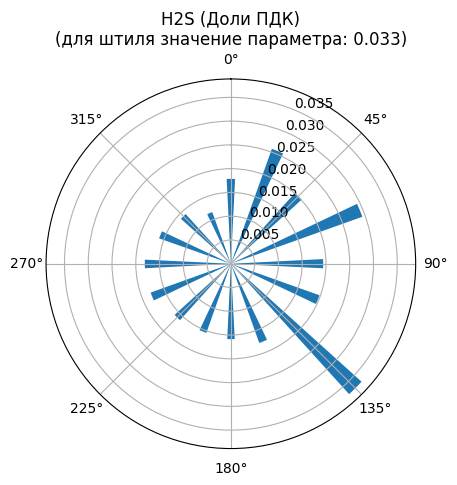

In [47]:
for param_name in param_list:
    df_by_wind = pd.pivot_table(result, index='DD', values=param_name, aggfunc=['mean', 'median', 'count'], observed=False)
    # добавляем столбец с направлением ветра в градусах
    df_by_wind['Направление в градусах'] = df_by_wind.index.map(wind_directions_degrees)
    display(df_by_wind)

    directions = list(df_by_wind['Направление в градусах'].index).remove('Штиль, безветрие')
    degrees = df_by_wind['Направление в градусах'].values
    # Исключаем NaN из массива с помощью булевой индексации
    degrees = degrees[~np.isnan(degrees)]

    # Визуализировать будем средние значения параметра (можно еще медианные)
    values = df_by_wind[('mean', param_name)].values

    # Роза ветров
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.bar([d * (3.14/180) for d in degrees], values[0:-1], width=0.1)
    ax.set_theta_zero_location('N')  # Север сверху
    ax.set_theta_direction(-1)  # По часовой стрелке
    # Значение параметря при штиле
    value0 = df_by_wind[('mean', param_name)]['Штиль, безветрие']
    ax.set_title(f'{param_name}\n(для штиля значение параметра: {value0:.3f})')
    plt.show()

## Выводы 

**Анализ графиков качества воздуха позволяет сделать следующие выводы:**
- Содержание взвешенных частиц фракции PM2.5 и PM10 изредка превышают предельно-допустимую концентрацию (Доля ПДК более 1).
- Содержание углекислого газа (CO), диоксида азота (NO2) и диоксида серы (SO2) не превышают ПДК
- Содержание приземистого озона (O3) всегда в пределах ПДК, но есть два странных превышения ПДК в ноябре 2022 в 4.2 раза и январе 2024 примерно в 1.3 раза
- Содержание сероводорода не превышает 1/3 от ПДК

Данные по температуре воздуха, полученные с разных станций наблюдения в целом похоже друг на друга, но небольшие расхождения все же есть. Возможно они вызваны тем что измерения производятся на разных станциях наблюдения.

**Анализ графиков параметров качества воздуха в зависимости от направления ветра:**
- Содержание взвешенных частиц фракции PM2.5 и PM10 существенно зависит от направления ветра и заметно увеличивается, когда ветер дует с юго-востока. Анализ карты показал что в этом направлении от станции наблюдения находится полигон ТБО, что видимо и вызывает повышение этого показателя когда ветер дует со стороны полигона (на карте север вверху). Но еще больше эти показатель при штиле, когда нет ветра.
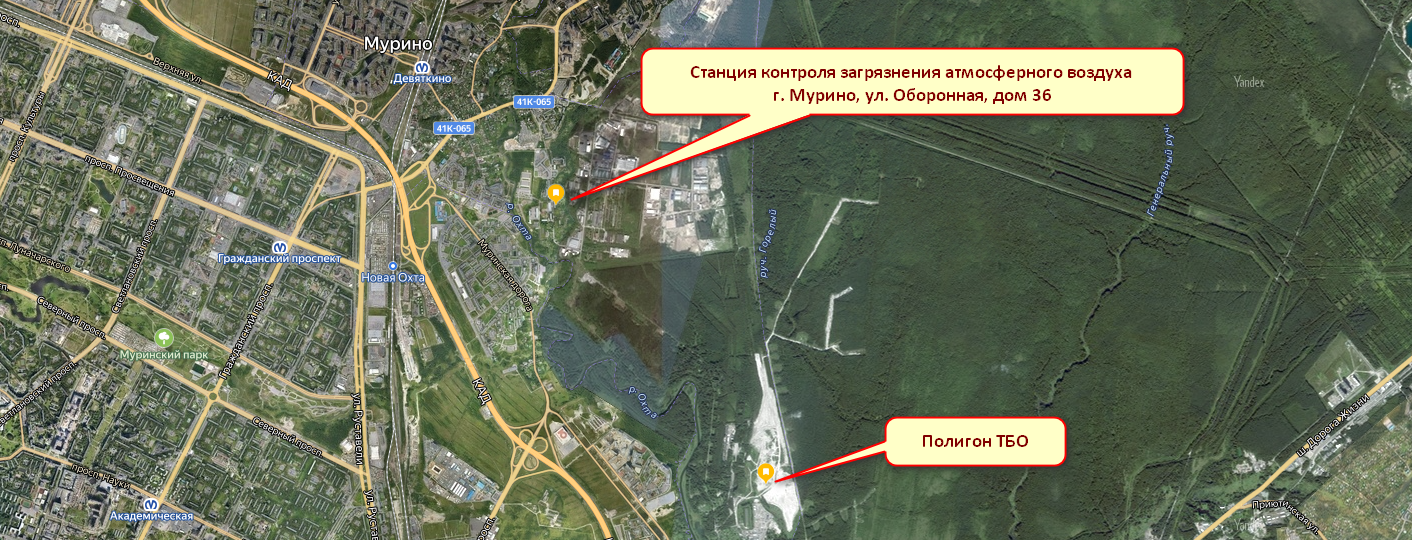

- концентрация углекислого газа (CO) незначительно увеличивается при северном ветре
- содержание диоксида азота (NO2) и озона (О3) немного увеличивается при северо-восточном ветре, когда воздух приноситься из лесного массива
- содержание диоксида серы (SO2) в воздухе заметно повышается при отсутствии ветра (среднее значение 0.022 от ПДК, тогда как при наличии ветра этот показатель не превышает 0.006 от ПДК)
- содеражение сероводорода (H2S) максимально при юго-восточном ветре

## Обсуждение

- В рамках исследования хотелось получить информацию о качестве воздуха и возможных источниках загрязнения. В целом это получилось сделать
- К сожалению данные со станций наблюдения имеют пробелы в данных (не для всех дней имеются данные с метеостанций). Было бы неплохо иметь сеть метеостанций и открытый доступ к данным с них. Сейчас эту информацию непросто найти и в некоторых случаях совсем нет исторических данных.
- Для улучшения исследования можно охватить бОльший временной интервал, но для этого нужно найти источники данных, в которых есть данные о качестве воздуха и направлении ветра ранее 2023 года. Это позволило бы оценить долгосрочные тренды изменения качества воздуха.
- Исследование могло бы быть полезно жителям Санкт-Петербурга и Ленинградской области. Для того чтобы исследование могло принести пользу можно разработать приложение или телеграм-бота, который бы выявлял ситуации с превышением ПДК загрязняющих веществ и оперативно оповещал об этом органы власти или ответственных сотрудников чтобы во время выявить и устранить причину (как правило это может быть техногенная авария или пожар). 
- В качестве развития исследования можно провести такой анализ по разным районам Санкт-Петербурга и области чтобы выявить наиболее благоприятные с точки зрения качества воздуха районы.